# Importing Libraries

In [741]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearnex.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from yellowbrick.classifier import ROCAUC,ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearnex.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Loading Dataset

In [299]:
df = pd.read_excel("Readmission dataset.xlsx")
df.head()

,Patient_Nbr,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
0,8390,Caucasian,Male,[70-80),Unknown,Not Available,Discharged,Not Available,Below 3,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
1,20012,Caucasian,Male,[60-70),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,HM,...,No,Steady,No,No,No,No,No,No,Yes,Yes
2,50903,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Referral,Between 03 to 06,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
3,50636,Caucasian,Male,[50-60),Unknown,Not Available,Left AMA,Emergency Room,Below 3,Unknown,...,No,Steady,No,No,No,No,No,No,Yes,No
4,205,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Emergency Room,Below 3,HM,...,No,Up,No,No,No,No,No,Ch,Yes,No


## Checking Shape of the dataset

In [300]:
df.shape #36538 Rows and 43 Columns

(36538, 43)

## Checking Data Types of the Features

In [301]:
df.dtypes

Patient_Nbr                  int64
Race                        object
Gender                      object
Age                         object
Weight                      object
Admission Type              object
Discharge Disposition       object
Admission Source            object
Days In Hospital            object
Payer_Code                  object
Medical_Specialty           object
Num_Lab_Procedures           int64
Num_Procedures               int64
Num_Medications              int64
Number_Diagnoses            object
Max_Glu_Serum               object
A1Cresult                   object
Metformin                   object
Repaglinide                 object
Nateglinide                 object
Chlorpropamide              object
Glimepiride                 object
Acetohexamide               object
Glipizide                   object
Glyburide                   object
Tolbutamide                 object
Pioglitazone                object
Rosiglitazone               object
Acarbose            

In [302]:
#Getting Numerical and Categorical columns
num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(include = 'object')
len(num.columns),len(cat.columns)
#4 Numeric and 39 categorical columns

(4, 39)

In [303]:
num.columns

Index(['Patient_Nbr', 'Num_Lab_Procedures', 'Num_Procedures',
       'Num_Medications'],
      dtype='object')

In [304]:
cat.columns

Index(['Race', 'Gender', 'Age', 'Weight', 'Admission Type',
       'Discharge Disposition', 'Admission Source', 'Days In Hospital',
       'Payer_Code', 'Medical_Specialty', 'Number_Diagnoses', 'Max_Glu_Serum',
       'A1Cresult', 'Metformin', 'Repaglinide', 'Nateglinide',
       'Chlorpropamide', 'Glimepiride', 'Acetohexamide', 'Glipizide',
       'Glyburide', 'Tolbutamide', 'Pioglitazone', 'Rosiglitazone', 'Acarbose',
       'Miglitol', 'Troglitazone', 'Tolazamide', 'Examide', 'Citoglipton',
       'Insulin', 'Glyburide-Metformin', 'Glipizide-Metformin',
       'Glimepiride-Pioglitazone', 'Metformin-Rosiglitazone',
       'Metformin-Pioglitazone', 'Change', 'Diabetesmed', 'Readmitted'],
      dtype='object')

## Getting Summary Statistics of the Features

### Numeric

In [305]:
num.describe()
#Num_Precodures has low standard deviation meaning not much variation in the data.

,Patient_Nbr,Num_Lab_Procedures,Num_Procedures,Num_Medications
count,36538.000000,36538.000000,36538.000000,36538.000000
mean,29217.279216,43.800646,1.332448,16.007171
std,16904.104318,19.137932,1.681195,8.109806
min,1.000000,1.000000,0.000000,1.000000
25%,14562.250000,32.000000,0.000000,10.000000
50%,29216.000000,45.000000,1.000000,15.000000
75%,43831.750000,57.000000,2.000000,20.000000
max,58504.000000,114.000000,6.000000,75.000000


In [306]:
cat.describe(include = 'object')
# some columns have Unknown/Invalid as their frequent value.

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
count,36538,36538,36538,36538,36538,36538,36538,36538,36538,36538,...,36538,36538,36538,36538,36538,36538,36538,36538,36538,36538
unique,6,3,10,10,5,6,4,4,5,9,...,1,4,4,2,1,1,1,2,2,2
top,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,Unknown,Surgery,...,No,No,No,No,No,No,No,No,Yes,Yes
freq,27000,19913,9657,35137,25389,33919,19594,17838,18730,17444,...,36538,18715,36325,36534,36538,36538,36538,20205,27397,25432


# Exploratory Data Analysis

## Null Value Checking and Treatment

In [307]:
total=df.isnull().sum().sort_values(ascending=False) # Total Number of Null Values
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) # Calculating the percentage of missing values
missed=pd.concat([total,percent],axis=1,keys=['total','percent'])
missed
# We can seee that Max_Glu_Serum and A1Cresult with 92% and 84% of NUll Vallues Respectively

,total,percent
Max_Glu_Serum,33768,92.418852
A1Cresult,30777,84.232853
Patient_Nbr,0,0.000000
Glipizide,0,0.000000
Tolbutamide,0,0.000000
Pioglitazone,0,0.000000
Rosiglitazone,0,0.000000
Acarbose,0,0.000000
Miglitol,0,0.000000
Troglitazone,0,0.000000


### Replacing Null values with Unknown/Invalid 

In [308]:
df1 = df.copy()
df1.fillna('Unknown',inplace = True)
#for this case we trying to replace the Null values with Unknown labels which then replaced by top occuring 

In [309]:
num = df1.select_dtypes(include = np.number)
cat = df1.select_dtypes(include = 'object')
len(num.columns),len(cat.columns)

(4, 39)

In [310]:
df1.shape

(36538, 43)

## HeatMap for Checking Multi-Collinearity

<Axes: >

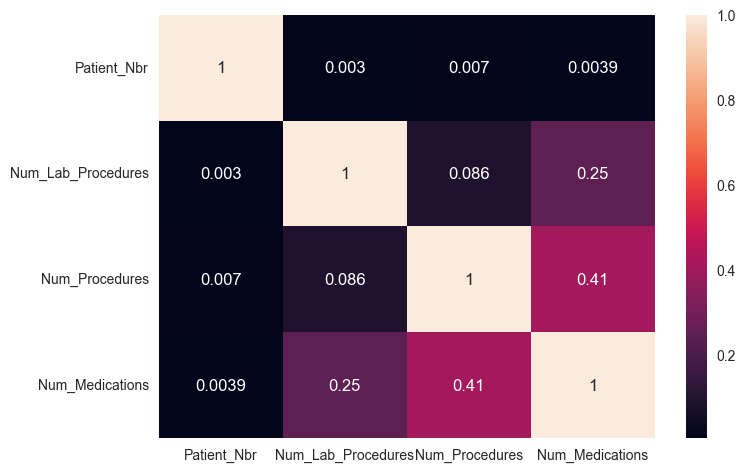

In [311]:
sb.heatmap(num.corr(),annot = True)
# We can see that there's multicollinearity in data.

## Checking Representation of each data

### Numerical

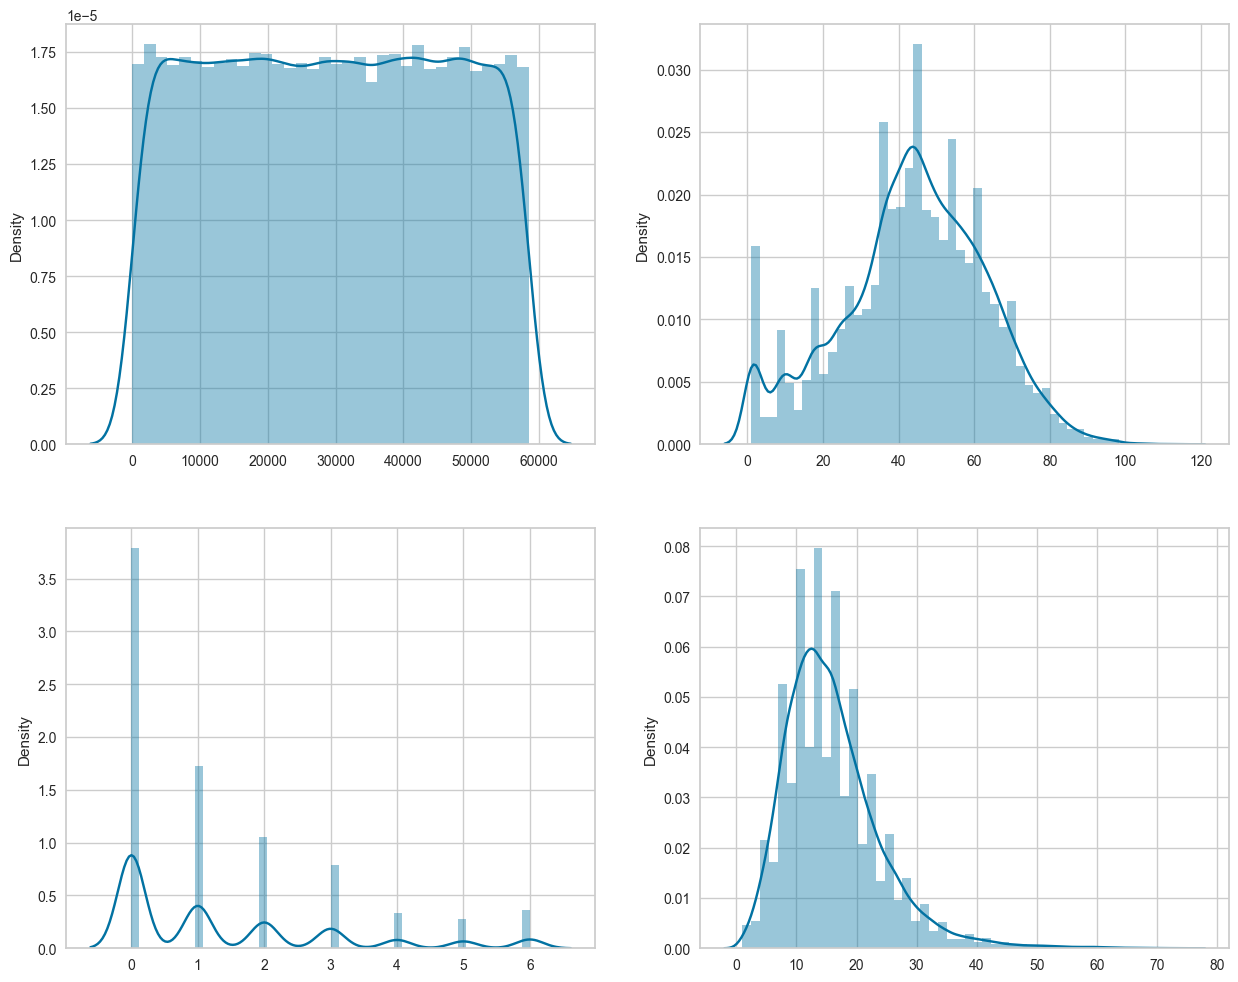

In [893]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,12])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sb.distplot(x=df[i],ax=j)
plt.show()
#Num_Lab_Precedures and Num_Medications are right skewed and does not follow actual normal distributions

### Categorical 

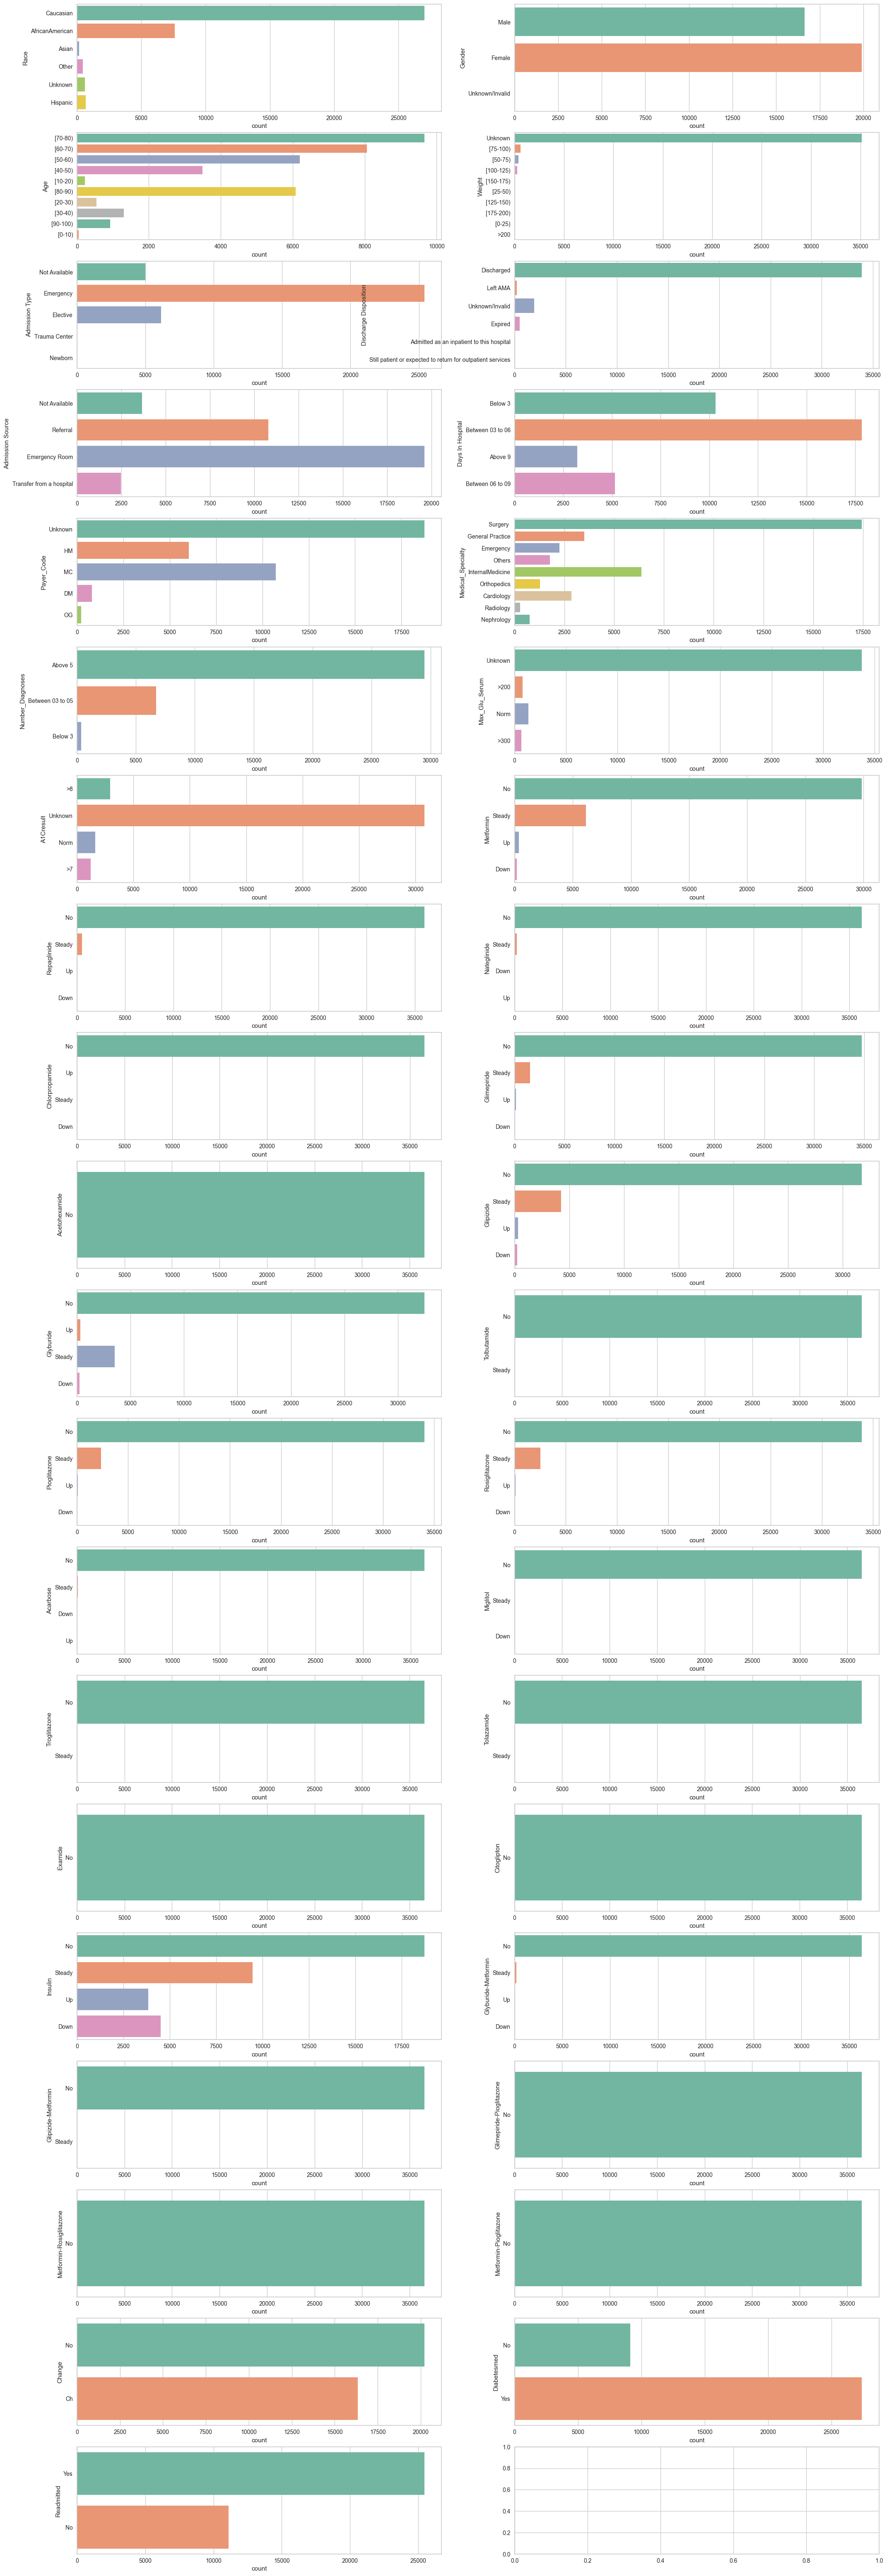

In [316]:
fig,ax=plt.subplots(nrows=20,ncols=2,figsize=[25,80])
for i,j in zip(df1.select_dtypes('object').columns,ax.flatten()):
    sb.countplot(df1[i],ax=j,palette='Set2')
plt.show()

## OutLiers Checking and Treatment

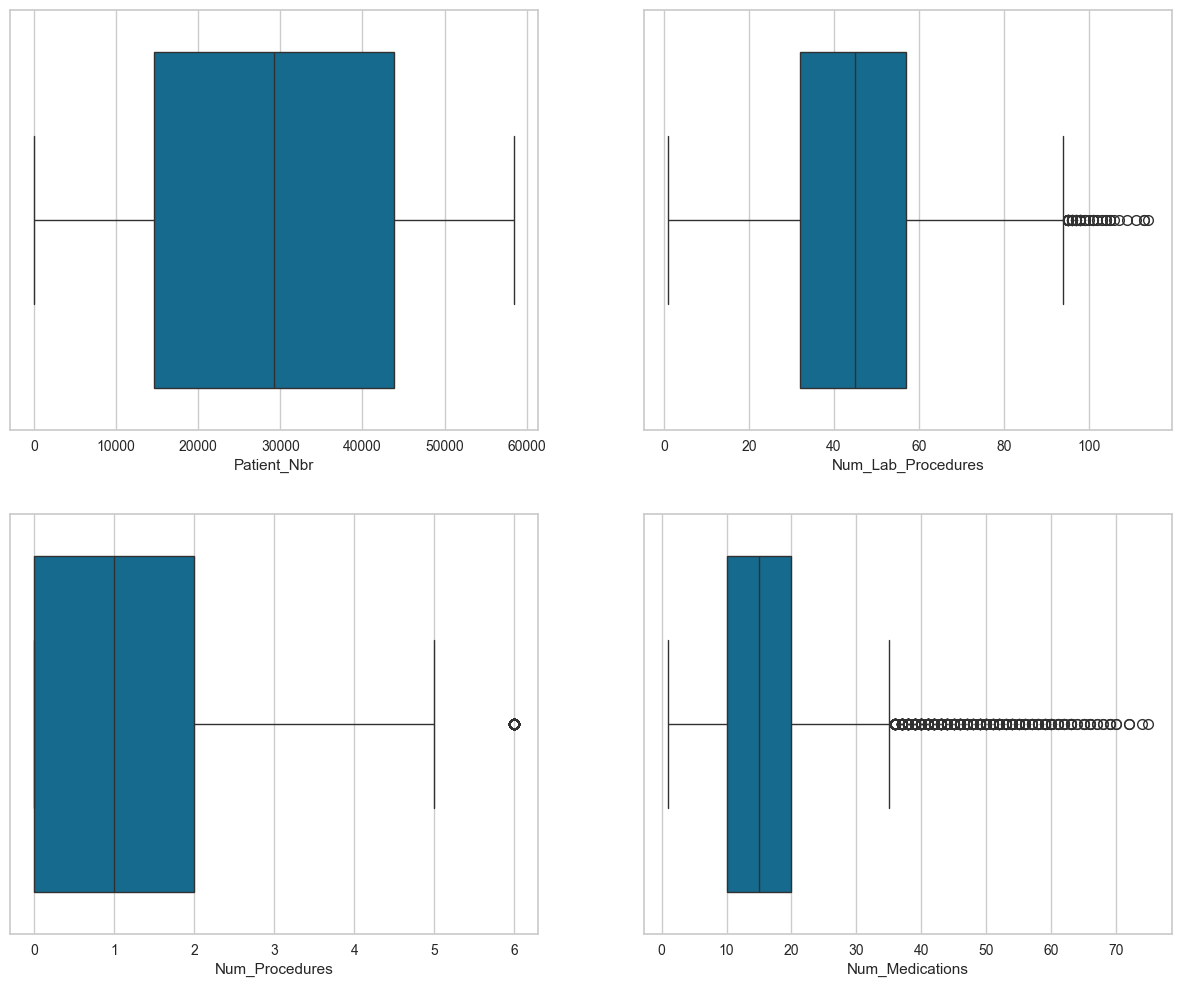

In [312]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,12])
for i,j in zip(df1.select_dtypes(np.number).columns,ax.flatten()):
    sb.boxplot(x=df[i],ax=j)
plt.show()
#Checking BoxPlots for outliers

### Defining Function to Clip the Values instead of removing them

In [313]:
# The outliers are trimmed rather than removed so aas to not lose much information
def outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low_lim=q1-(1.5*iqr)
    up_lim=q3+(1.5*iqr)
    
    for x in df[col]:
        if x>up_lim:
            df[col]=df[col].replace(to_replace=x,value=up_lim)
        elif x<low_lim:
            df[col]=df[col].replace(to_replace=x,value=low_lim)

In [314]:
for i in ['Num_Lab_Procedures','Num_Medications']:
    outliers(df1,i)

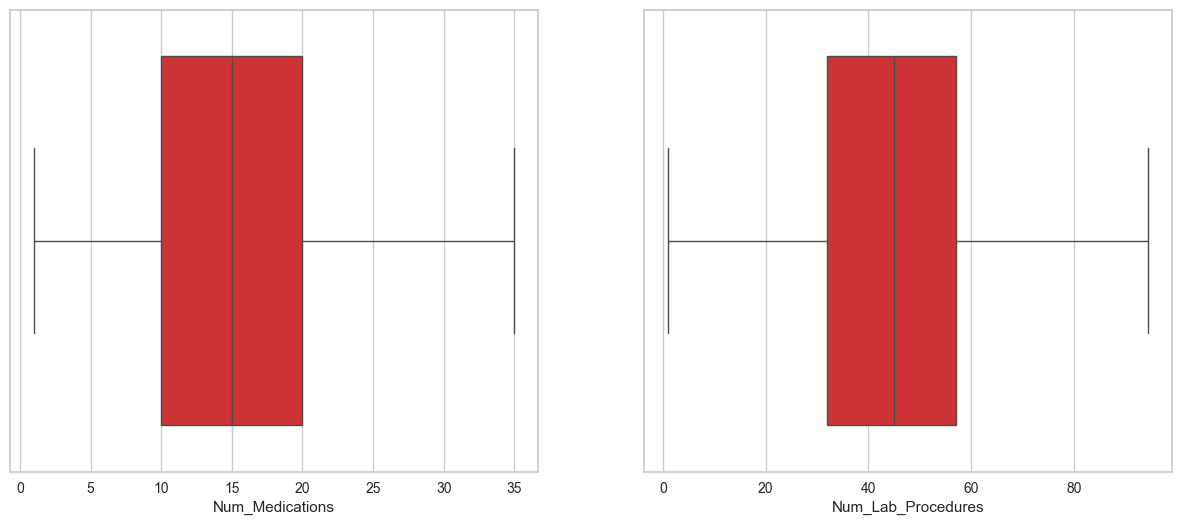

In [890]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=[15,6])
for i,j in zip(df1[['Num_Medications','Num_Lab_Procedures']].columns,ax.flatten()):
    sb.boxplot(x=df1[i],ax=j,palette='Set1')
plt.show()

## Checking Distribution of Target Variables with the comparison to Independent Variables

### Numerical

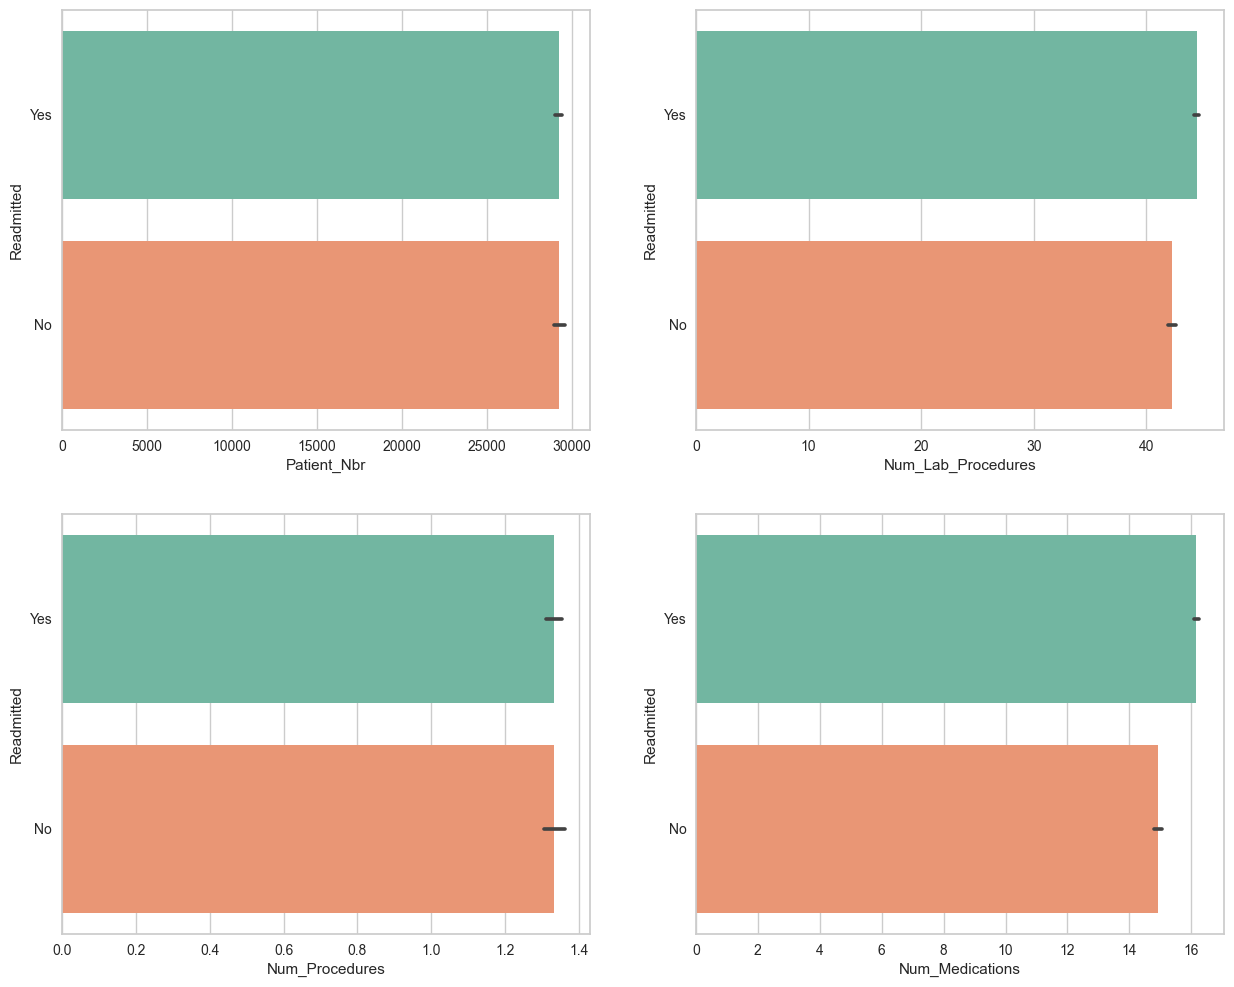

In [317]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=[15,12])
for i,j in zip(num.columns,ax.flatten()):
    sb.barplot(x=df1[i],y=df1['Readmitted'],ax=j,palette='Set2')
plt.show()

### Categorical

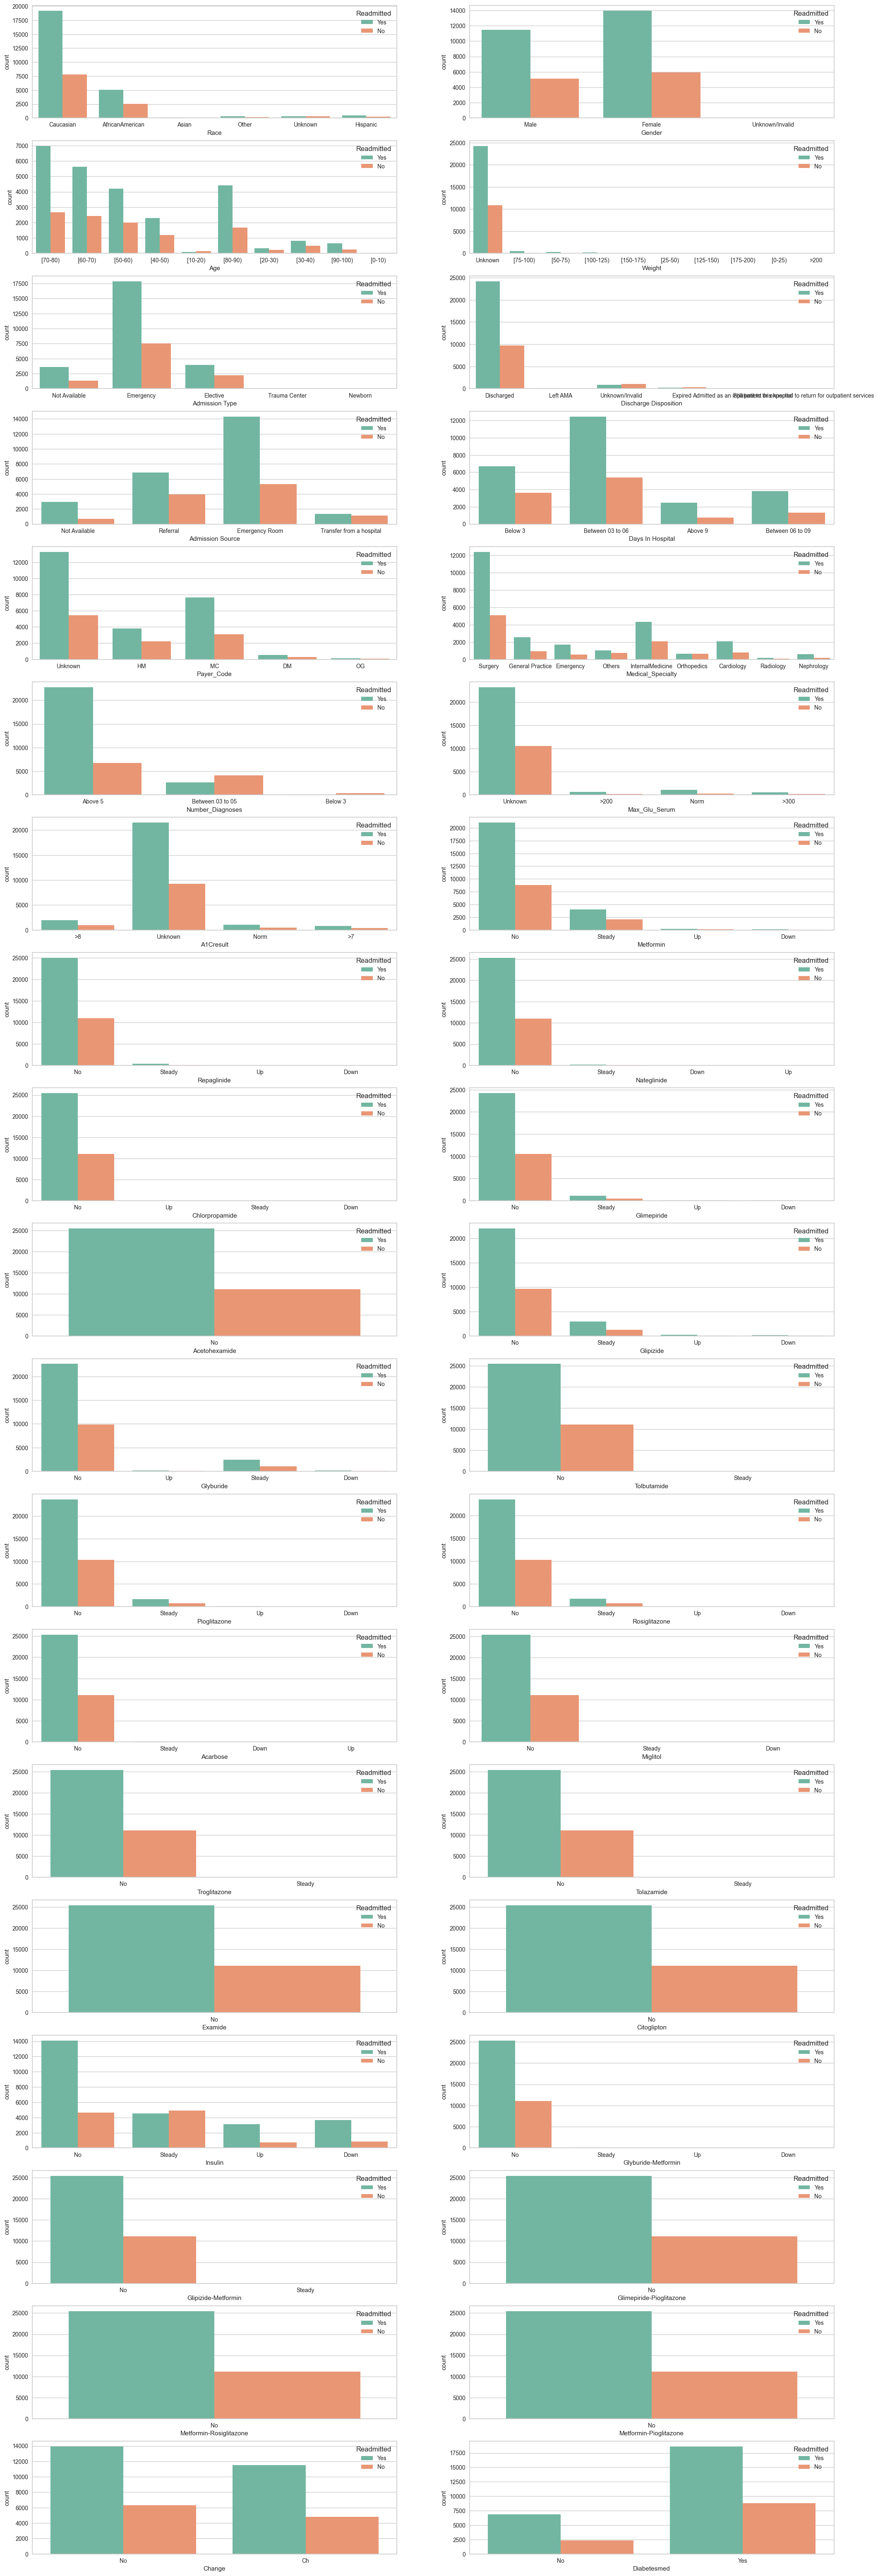

In [318]:
#Repesentation of target variables by each categories of the feeatures 
fig,ax=plt.subplots(nrows=19,ncols=2,figsize=[25,80])
for i,j in zip(cat.columns,ax.flatten()):
    sb.countplot(x=df1[i],orient = 'x',hue=df1['Readmitted'],ax=j,palette='Set2')
plt.show()
#We can see Imbalance in the data due to "Yes" representing 70% of the dataset.

## Identifying the Percentage of each category in each of the features

In [319]:
#Checking Proportion of each category of the feature
for i in cat.columns:
    print(i,'Column:')
    print('Number of categories: ', df[i].nunique(),'\n')
    print('% of observations in ',i, ':')
    print(df1[i].value_counts(normalize=True),'\n')

Race Column:
Number of categories:  6 

% of observations in  Race :
Race
Caucasian          0.738957
AfricanAmerican    0.207921
Hispanic           0.018884
Unknown            0.017051
Other              0.012617
Asian              0.004571
Name: proportion, dtype: float64 

Gender Column:
Number of categories:  3 

% of observations in  Gender :
Gender
Female             0.544994
Male               0.454978
Unknown/Invalid    0.000027
Name: proportion, dtype: float64 

Age Column:
Number of categories:  10 

% of observations in  Age :
Age
[70-80)     0.264300
[60-70)     0.220674
[50-60)     0.169577
[80-90)     0.166594
[40-50)     0.095408
[30-40)     0.035634
[90-100)    0.025343
[20-30)     0.014943
[10-20)     0.006158
[0-10)      0.001368
Name: proportion, dtype: float64 

Weight Column:
Number of categories:  10 

% of observations in  Weight :
Weight
Unknown      0.961656
[75-100)     0.016093
[50-75)      0.011057
[100-125)    0.007362
[125-150)    0.001451
[25-50)      0.0

## Conversion Invalid Data into Valid Data by replacing values with most frequent value

Replacing Unknown and Invalid valid values with top valid category of the columns or features

In [321]:
var = ['Gender','Weight','Admission Type','Admission Source','Discharge Disposition','Payer_Code','Max_Glu_Serum','A1Cresult','Race']
to_replace = ['Unknown/Invalid','Unknown','Not Available','Not Available','Unknown/Invalid','Unknown','Unknown','Unknown','Unknown']
value = ['Female','[75-100)','Emergency','Emergency','Discharged','MC','Norm','>8','Caucasian']

In [322]:
for i,j,k in zip(var,to_replace,value):
    df1[i].replace(j,k,inplace=True)

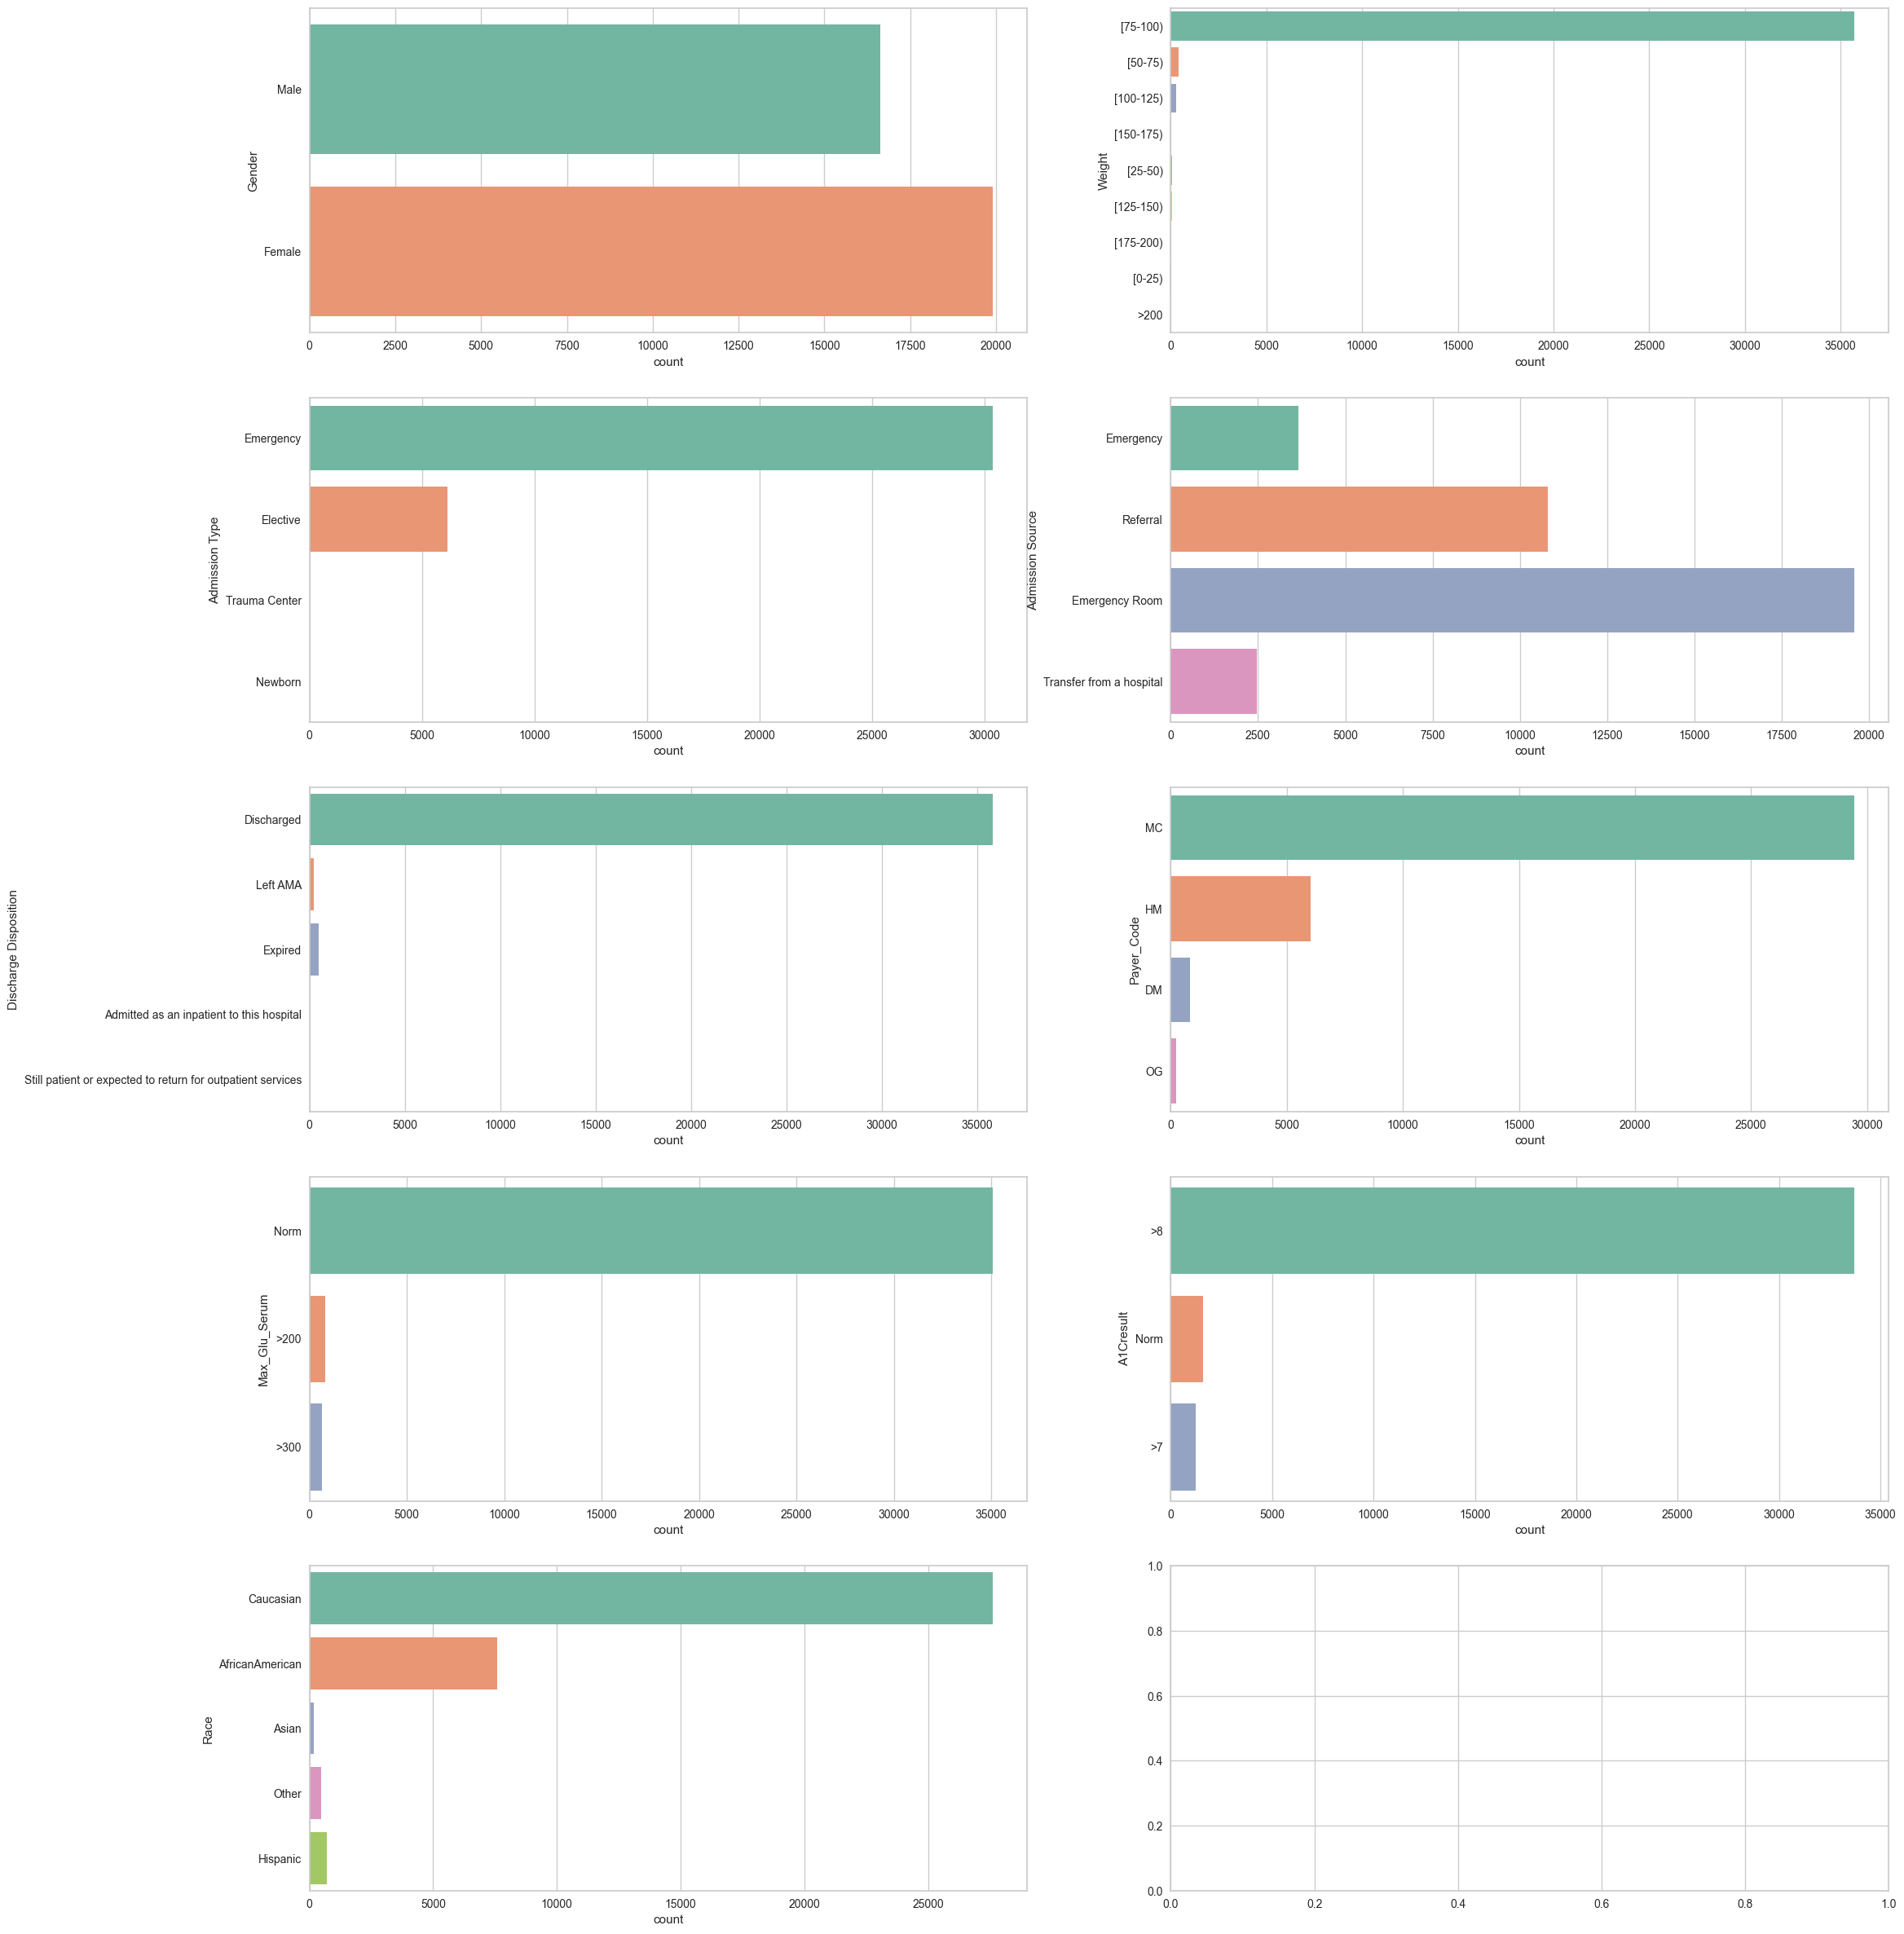

In [967]:
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=[25,30])
for i,j in zip(df1[var].columns,ax.flatten()):
    sb.countplot(df1[i],ax=j,palette='Set2')
plt.show()

### Setting Patient Number as Index

In [324]:
df1.set_index('Patient_Nbr',inplace = True)

In [325]:
df1.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,Caucasian,Male,[70-80),[75-100),Emergency,Discharged,Emergency,Below 3,MC,Surgery,...,No,No,No,No,No,No,No,No,No,Yes
20012,Caucasian,Male,[60-70),[75-100),Emergency,Discharged,Emergency,Between 03 to 06,HM,Surgery,...,No,Steady,No,No,No,No,No,No,Yes,Yes
50903,Caucasian,Female,[70-80),[75-100),Emergency,Discharged,Referral,Between 03 to 06,MC,General Practice,...,No,No,No,No,No,No,No,No,No,Yes
50636,Caucasian,Male,[50-60),[75-100),Emergency,Left AMA,Emergency Room,Below 3,MC,Surgery,...,No,Steady,No,No,No,No,No,No,Yes,No
205,Caucasian,Female,[40-50),[75-100),Emergency,Discharged,Emergency Room,Below 3,HM,Surgery,...,No,Up,No,No,No,No,No,Ch,Yes,No


# Statistical Tests to identify Influencial variables

## Chi_square test for Categorical Variables

In [326]:
# Null Hypothesis : The target is dependent on the independent variable.
# Alternate Hypothesis: The target variable is independent of Variable
scol=[]
spval=[]
ss=[]
for n in df1.select_dtypes(include=object).columns:
    scol.append(n)
    cp=chi2_contingency(pd.crosstab(df1[n],df1['Readmitted']))[1]
    spval.append(round(cp,4))
    if(cp<0.05):
        ss.append('Significant')
    else:
        ss.append('Insignifcant')
a=pd.DataFrame({'Feature':scol,'P-Value':spval,'Significance':ss})
a

,Feature,P-Value,Significance
0,Race,0.0000,Significant
1,Gender,0.0275,Significant
2,Age,0.0000,Significant
3,Weight,0.0000,Significant
4,Admission Type,0.0000,Significant
5,Discharge Disposition,0.0000,Significant
6,Admission Source,0.0000,Significant
7,Days In Hospital,0.0000,Significant
8,Payer_Code,0.0000,Significant
9,Medical_Specialty,0.0000,Significant


Insignificant Variables

In [327]:
a[a.Significance=='Insignifcant']

,Feature,P-Value,Significance
12,A1Cresult,0.0816,Insignifcant
15,Nateglinide,0.4275,Insignifcant
16,Chlorpropamide,0.4802,Insignifcant
17,Glimepiride,0.5263,Insignifcant
18,Acetohexamide,1.0000,Insignifcant
20,Glyburide,0.1003,Insignifcant
21,Tolbutamide,0.8644,Insignifcant
22,Pioglitazone,0.8216,Insignifcant
23,Rosiglitazone,0.7949,Insignifcant
24,Acarbose,0.3529,Insignifcant


In [328]:
df2 = df1.drop(columns = a[a.Significance=='Insignifcant'].Feature)
df2.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Max_Glu_Serum,Metformin,Repaglinide,Glipizide,Tolazamide,Insulin,Glyburide-Metformin,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,Caucasian,Male,[70-80),[75-100),Emergency,Discharged,Emergency,Below 3,MC,Surgery,...,Norm,No,No,No,No,No,No,No,No,Yes
20012,Caucasian,Male,[60-70),[75-100),Emergency,Discharged,Emergency,Between 03 to 06,HM,Surgery,...,>200,No,No,No,No,Steady,No,No,Yes,Yes
50903,Caucasian,Female,[70-80),[75-100),Emergency,Discharged,Referral,Between 03 to 06,MC,General Practice,...,Norm,No,No,No,No,No,No,No,No,Yes
50636,Caucasian,Male,[50-60),[75-100),Emergency,Left AMA,Emergency Room,Below 3,MC,Surgery,...,Norm,No,No,No,No,Steady,No,No,Yes,No
205,Caucasian,Female,[40-50),[75-100),Emergency,Discharged,Emergency Room,Below 3,HM,Surgery,...,Norm,No,No,No,No,Up,No,Ch,Yes,No


In [329]:
df2.shape

(36538, 24)

## ANOVA for Numerical Varibles

In [330]:
# Null Hypothesis : The target is dependent on the independent variable.
# Alternate Hypothesis: The target variable is independent of Variable
tcol=[]
tpval=[]
ts=[]
for n in df2.select_dtypes(include='number').columns:
    tcol.append(n)
    g1=df2[n][df2['Readmitted']=='Yes']
    g2=df2[n][df2['Readmitted']=='No']
    
    s,p=f_oneway(g1,g2)
    tpval.append(round(p,4))
    if (p<=0.05):
        ts.append('Significant')
    else:
        ts.append('Insignifcant')
b = pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significance':ts})
b

,Feature,P-Value,Significance
0,Num_Lab_Procedures,0.0000,Significant
1,Num_Procedures,0.9686,Insignifcant
2,Num_Medications,0.0000,Significant


In [331]:
df2 = df2.drop(columns = 'Num_Procedures')
df2.columns

Index(['Race', 'Gender', 'Age', 'Weight', 'Admission Type',
       'Discharge Disposition', 'Admission Source', 'Days In Hospital',
       'Payer_Code', 'Medical_Specialty', 'Num_Lab_Procedures',
       'Num_Medications', 'Number_Diagnoses', 'Max_Glu_Serum', 'Metformin',
       'Repaglinide', 'Glipizide', 'Tolazamide', 'Insulin',
       'Glyburide-Metformin', 'Change', 'Diabetesmed', 'Readmitted'],
      dtype='object')

In [919]:
df_final = df2.copy()
df_final.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Max_Glu_Serum,Metformin,Repaglinide,Glipizide,Tolazamide,Insulin,Glyburide-Metformin,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,Caucasian,Male,[70-80),[75-100),Emergency,Discharged,Emergency,Below 3,MC,Surgery,...,Norm,No,No,No,No,No,No,No,No,Yes
20012,Caucasian,Male,[60-70),[75-100),Emergency,Discharged,Emergency,Between 03 to 06,HM,Surgery,...,>200,No,No,No,No,Steady,No,No,Yes,Yes
50903,Caucasian,Female,[70-80),[75-100),Emergency,Discharged,Referral,Between 03 to 06,MC,General Practice,...,Norm,No,No,No,No,No,No,No,No,Yes
50636,Caucasian,Male,[50-60),[75-100),Emergency,Left AMA,Emergency Room,Below 3,MC,Surgery,...,Norm,No,No,No,No,Steady,No,No,Yes,No
205,Caucasian,Female,[40-50),[75-100),Emergency,Discharged,Emergency Room,Below 3,HM,Surgery,...,Norm,No,No,No,No,Up,No,Ch,Yes,No


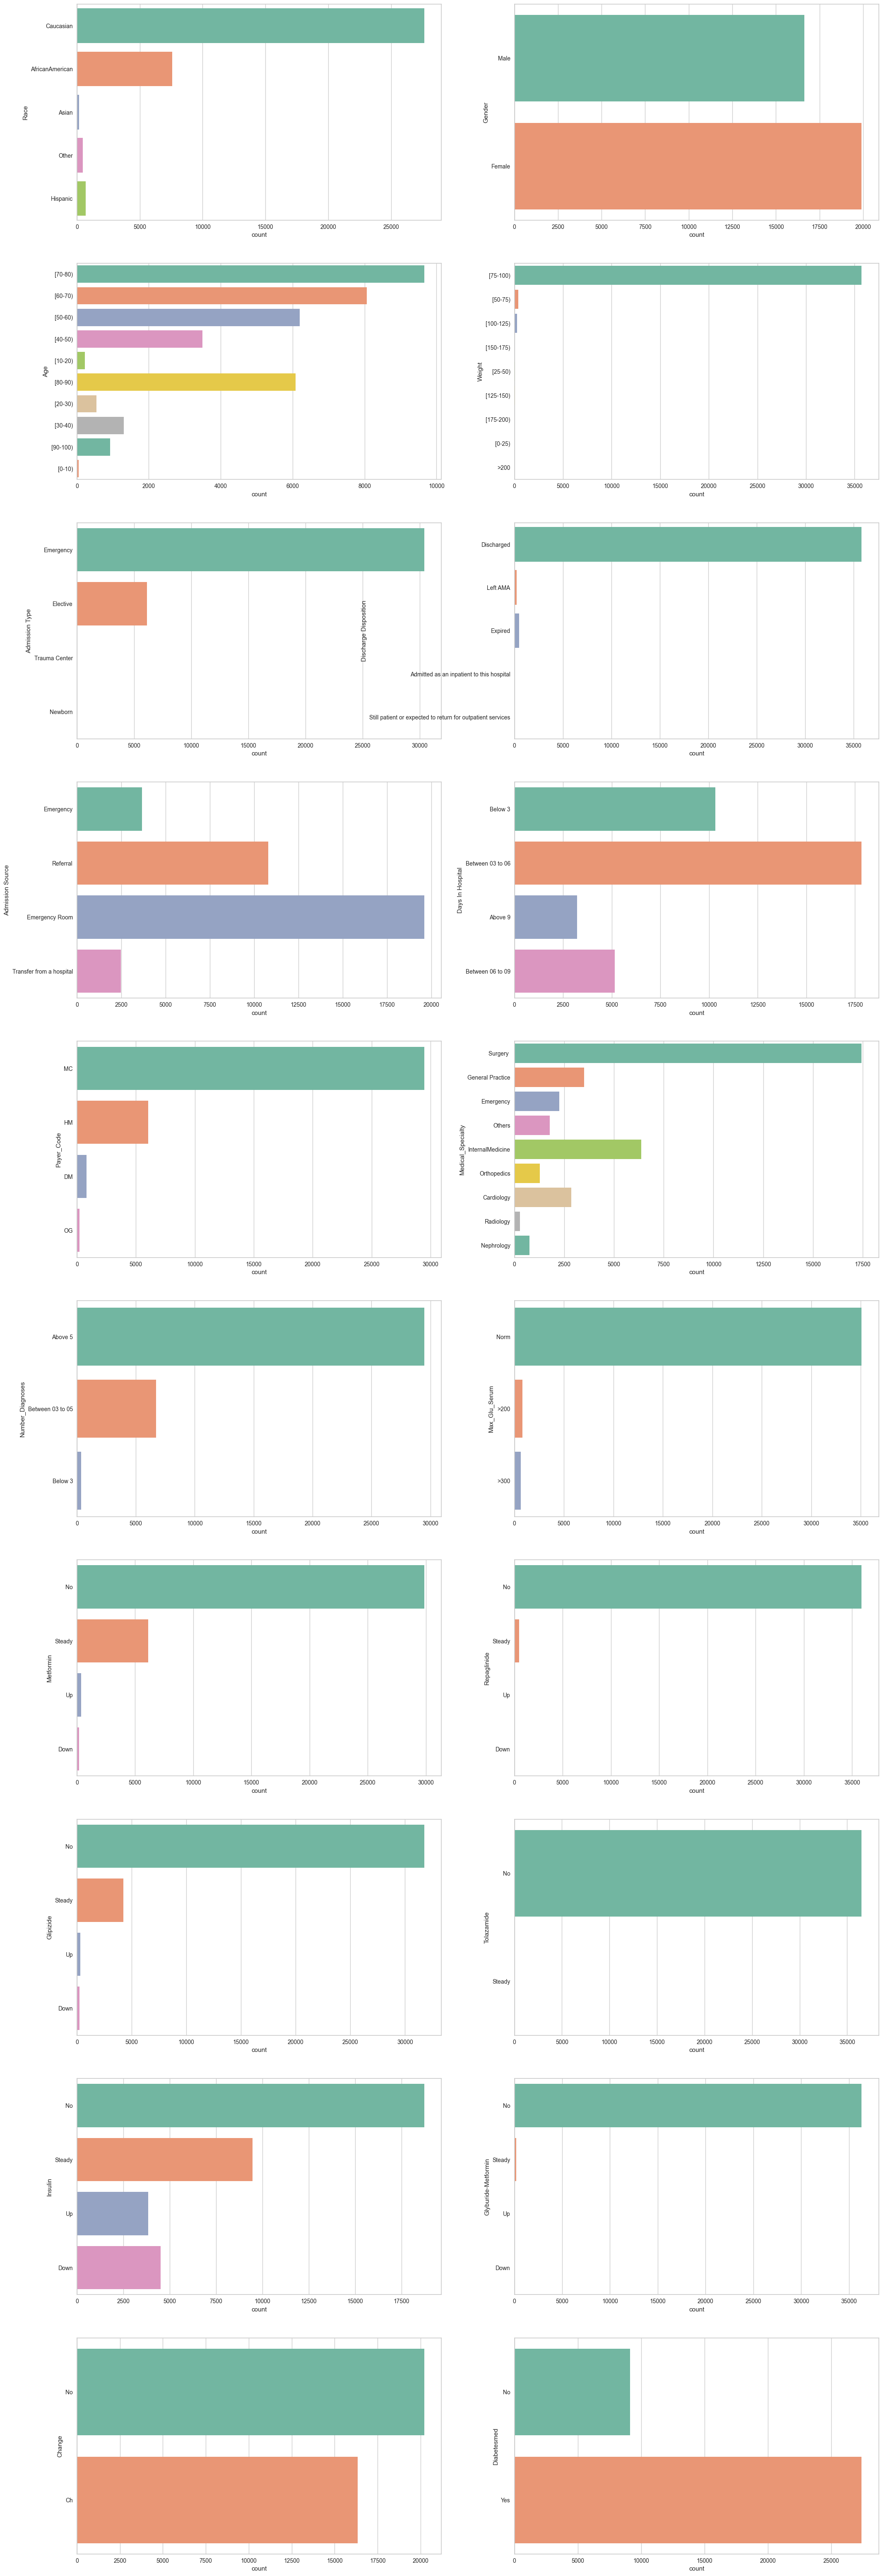

In [565]:
fig,ax=plt.subplots(nrows=10,ncols=2,figsize=[25,80])
for i,j in zip(df_final.select_dtypes('object').columns,ax.flatten()):
    sb.countplot(df_final[i],ax=j,palette='Set2')
plt.show()

# Label Encoding the Categorical Variables

Encoding Categorical Variables Using Label Encoder

In [920]:
#Encoding the categories with Numbers in alphabetical order
LE = LabelEncoder()
for i in df_final.select_dtypes(object).columns:
    
    df_final[i]=LE.fit_transform(df_final[i])

In [567]:
df_final.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Max_Glu_Serum,Metformin,Repaglinide,Glipizide,Tolazamide,Insulin,Glyburide-Metformin,Change,Diabetesmed,Readmitted
Patient_Nbr,,,,,,,,,,,,,,,,,,,,,
8390,2,1,7,8,1,1,0,1,2,8,...,2,1,1,1,0,1,1,1,0,1
20012,2,1,6,8,1,1,0,2,1,8,...,0,1,1,1,0,2,1,1,1,1
50903,2,0,7,8,1,1,2,2,2,2,...,2,1,1,1,0,1,1,1,0,1
50636,2,1,5,8,1,3,1,1,2,8,...,2,1,1,1,0,2,1,1,1,0
205,2,0,4,8,1,1,1,1,1,8,...,2,1,1,1,0,3,1,0,1,0


In [921]:
df_final.dtypes

Race                       int32
Gender                     int32
Age                        int32
Weight                     int32
Admission Type             int32
Discharge Disposition      int32
Admission Source           int32
Days In Hospital           int32
Payer_Code                 int32
Medical_Specialty          int32
Num_Lab_Procedures       float64
Num_Medications            int64
Number_Diagnoses           int32
Max_Glu_Serum              int32
Metformin                  int32
Repaglinide                int32
Glipizide                  int32
Tolazamide                 int32
Insulin                    int32
Glyburide-Metformin        int32
Change                     int32
Diabetesmed                int32
Readmitted                 int32
dtype: object

# Train Test Split

In [922]:
X = df_final.drop(columns = 'Readmitted')
y = df_final.Readmitted
Xc = sm.add_constant(X)

In [923]:
X_train,X_test,y_train,y_test = train_test_split(Xc, y, test_size = 0.25, random_state = 8)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((27403, 23), (27403,), (9135, 23), (9135,))

In [924]:
f_oneway(y_train,y_test,y)
# p_value>0.05 meaning they are from the same population

F_onewayResult(statistic=1.4730722058148515, pvalue=0.22922699748328698)

# Modelling

In [925]:
# Printing Classification Model
def get_test_report(model, X_test,y_test): 
    testpred = model.predict(X_test)
    return(classification_report(y_test, testpred))

## Base Logistic Regression

In [926]:
model1 = sm.Logit(y_train,X_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.543367
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Readmitted   No. Observations:                27403
Model:                          Logit   Df Residuals:                    27380
Method:                           MLE   Df Model:                           22
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                  0.1124
Time:                        00:04:20   Log-Likelihood:                -14890.
converged:                       True   LL-Null:                       -16776.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.8985      0.373     10.450      0.000       3.167       4.630
Race                      0.0241      0.016      1.466      0.143      -0.008       0.056
Gender                   -0.0148      0.029     -0.514      0.607      -0.071       0.042
Age                       0.0309      0.009      3.320      0.001       0.013       0.049
Weight                   -0.1386      0.030     -4.590      0.000      -0.198      -0.079
Admission Type            0.0524      0.042      1.250      0.211      -0.030       0.135
Discharge Disposition    -0.6689      0.070     -9.554      0.000      -0.806      -0.532
Admission Source         -0.2797      0.022    -12.908      0.000      -0.322      -0.237
Days In Hospital          0.0032      0.018      0.183      0.855      -0.031       0.038
Payer_Code                0.1186      0.031      3.879      0.000       0.059       0.178
Medical_Specialty        -0.0269      0.005     -5.513      0.000      -0.037      -0.017
Num_Lab_Procedures        0.0025      0.001      3.073      0.002       0.001       0.004
Num_Medications           0.0097      0.002      4.451      0.000       0.005       0.014
Number_Diagnoses         -0.7878      0.018    -44.519      0.000      -0.822      -0.753
Max_Glu_Serum            -0.1902      0.054     -3.541      0.000      -0.296      -0.085
Metformin                -0.1599      0.035     -4.572      0.000      -0.228      -0.091
Repaglinide               0.2734      0.117      2.336      0.019       0.044       0.503
Glipizide                 0.0758      0.039      1.931      0.053      -0.001       0.153
Tolazamide               -1.4654      0.536     -2.736      0.006      -2.515      -0.416
Insulin                  -0.3274      0.018    -17.867      0.000      -0.363      -0.291
Glyburide-Metformin      -0.0362      0.181     -0.199      0.842      -0.392       0.319
Change                   -0.2716      0.034     -7.891      0.000      -0.339      -0.204
Diabetesmed              -0.3900      0.041     -9.607      0.000      -0.470      -0.310
=========================================================================================
"""

In [927]:
ypred_prob = model1.predict(X_test)
ypred = [ 0 if x < 0.5 else 1 for x in ypred_prob]

In [928]:
train_pred_proba = model1.predict(X_train)
train_pred = [ 0 if x < 0.5 else 1 for x in train_pred_proba]
accuracy_score(y_train,train_pred)

0.7421085282633288

In [929]:
cm = confusion_matrix(y_test,ypred)
cm

array([[ 999, 1843],
       [ 552, 5741]], dtype=int64)

In [930]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.64      0.35      0.45      2842
           1       0.76      0.91      0.83      6293

    accuracy                           0.74      9135
   macro avg       0.70      0.63      0.64      9135
weighted avg       0.72      0.74      0.71      9135



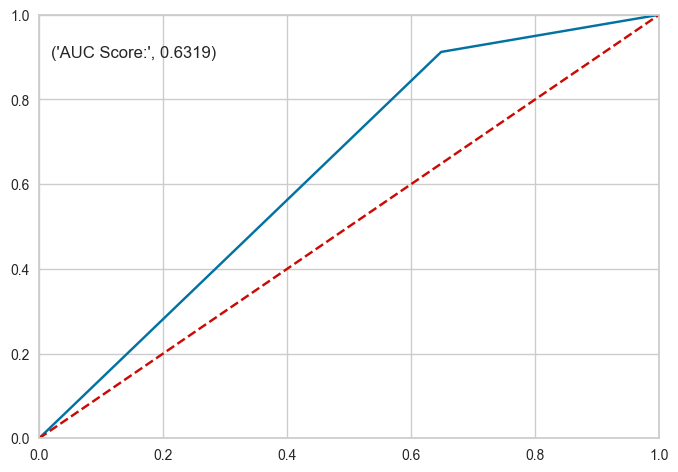

In [931]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, ypred),4)))
plt.show()

In [932]:
# ypred = model1.predict(X_test)
# cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m1=pd.DataFrame({'Model':['Base Logit'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(roc_auc_score(y_test,ypred),4)
            })
m1


,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319


## Removing Insignificant Variables from the model

In [933]:
Insignificant_Variables = pd.DataFrame(model1.pvalues[model1.pvalues>0.05],columns = ['Pvalue']).reset_index().rename(columns= {'index':'features'})
Insignificant_Variables

,features,Pvalue
0,Race,0.142596
1,Gender,0.607267
2,Admission Type,0.211445
3,Days In Hospital,0.854529
4,Glipizide,0.053424
5,Glyburide-Metformin,0.841983


In [934]:
df_final.drop(columns=Insignificant_Variables.features,inplace = True)

In [935]:
X = df_final.drop(columns = 'Readmitted')
y = df_final.Readmitted
Xc = sm.add_constant(X)

In [936]:
X_train,X_test,y_train,y_test = train_test_split(Xc, y, test_size = 0.25, random_state = 8)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((27403, 17), (27403,), (9135, 17), (9135,))

## Logistic Regression with Significant Variables

In [937]:
model2=sm.Logit(y_train,X_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.543503
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Readmitted   No. Observations:                27403
Model:                          Logit   Df Residuals:                    27386
Method:                           MLE   Df Model:                           16
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                  0.1122
Time:                        00:04:27   Log-Likelihood:                -14894.
converged:                       True   LL-Null:                       -16776.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.0452      0.315     12.862      0.000       3.429       4.662
Age                       0.0343      0.009      3.728      0.000       0.016       0.052
Weight                   -0.1396      0.030     -4.626      0.000      -0.199      -0.080
Discharge Disposition    -0.6700      0.070     -9.580      0.000      -0.807      -0.533
Admission Source         -0.2904      0.020    -14.577      0.000      -0.329      -0.251
Payer_Code                0.1178      0.031      3.859      0.000       0.058       0.178
Medical_Specialty        -0.0268      0.005     -5.493      0.000      -0.036      -0.017
Num_Lab_Procedures        0.0027      0.001      3.430      0.001       0.001       0.004
Num_Medications           0.0093      0.002      4.353      0.000       0.005       0.013
Number_Diagnoses         -0.7878      0.018    -44.596      0.000      -0.822      -0.753
Max_Glu_Serum            -0.1948      0.054     -3.631      0.000      -0.300      -0.090
Metformin                -0.1606      0.035     -4.597      0.000      -0.229      -0.092
Repaglinide               0.2655      0.117      2.271      0.023       0.036       0.495
Tolazamide               -1.4650      0.536     -2.735      0.006      -2.515      -0.415
Insulin                  -0.3293      0.018    -18.019      0.000      -0.365      -0.293
Change                   -0.2773      0.034     -8.085      0.000      -0.345      -0.210
Diabetesmed              -0.3788      0.040     -9.438      0.000      -0.458      -0.300
=========================================================================================
"""

In [938]:
ypred_prob = model2.predict(X_test)
ypred = [ 0 if x < 0.5 else 1 for x in ypred_prob]
cm = confusion_matrix(y_test, ypred)
cm

array([[ 997, 1845],
       [ 549, 5744]], dtype=int64)

In [939]:
train_pred_proba = model2.predict(X_train)
train_pred = [ 0 if x < 0.5 else 1 for x in train_pred_proba]
accuracy_score(y_train,train_pred)

0.741342188811444

In [940]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.64      0.35      0.45      2842
           1       0.76      0.91      0.83      6293

    accuracy                           0.74      9135
   macro avg       0.70      0.63      0.64      9135
weighted avg       0.72      0.74      0.71      9135



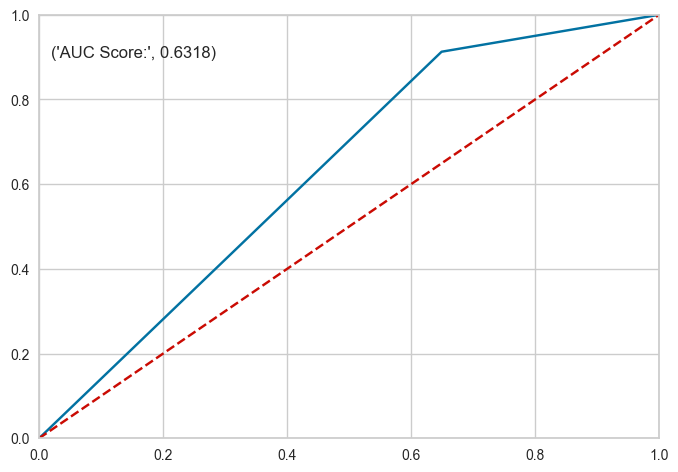

In [941]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, ypred),4)))
plt.show()

In [942]:
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m2=pd.DataFrame({'Model':['Logit with significant variables'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(roc_auc_score(y_test,ypred),4)
            })
m2


,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318


In [943]:
Results = pd.concat([m1,m2],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318


## Train Test Split without constant/intercept

In [944]:
X = df_final.drop(columns = 'Readmitted')
y = df_final.Readmitted
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((27403, 16), (27403,), (9135, 16), (9135,))

## Base DecisionTree

In [945]:
dc=DecisionTreeClassifier(random_state=10)
model3=dc.fit(X_train,y_train)
ypred=model3.predict(X_test)

In [946]:
train_pred = model3.predict(X_train)
accuracy_score(y_train,train_pred)

0.9947086085465096

In [948]:
print(get_test_report(model3,X_test,y_test))

              precision    recall  f1-score   support

           0       0.47      0.50      0.49      2842
           1       0.77      0.75      0.76      6293

    accuracy                           0.67      9135
   macro avg       0.62      0.62      0.62      9135
weighted avg       0.68      0.67      0.67      9135



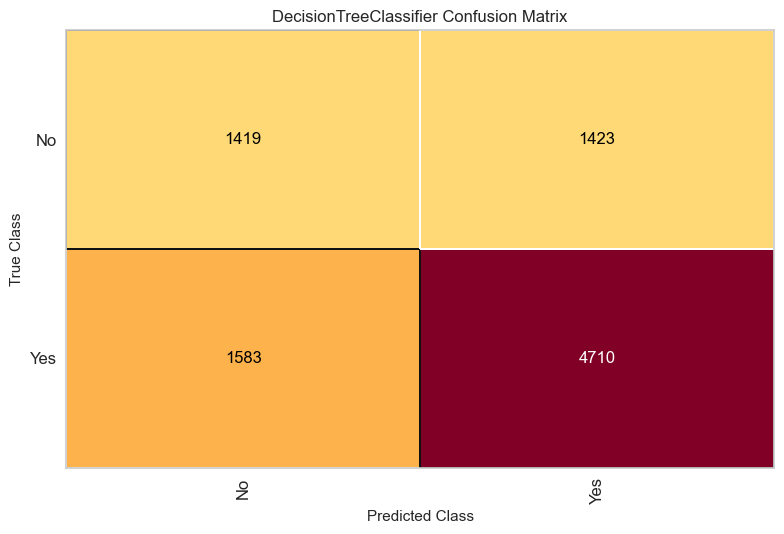

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [947]:
cm = ConfusionMatrix(model3, classes=['No','Yes'])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

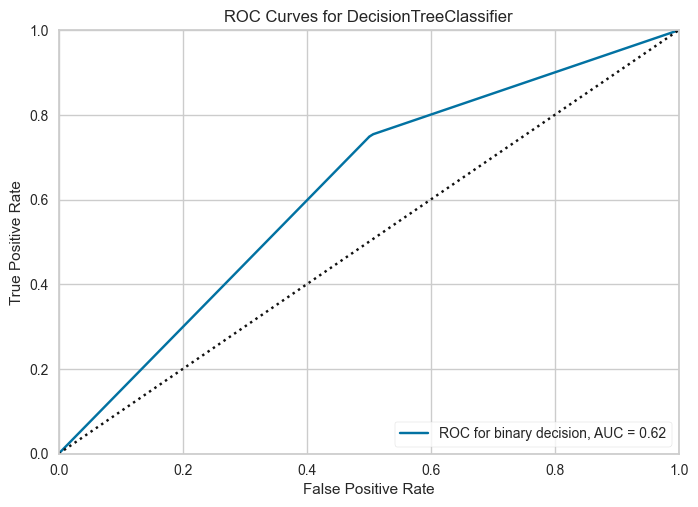

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [596]:
visualizer = ROCAUC(model3, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [597]:
ypred = model3.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m3=pd.DataFrame({'Model':['Base DecisionTree'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m3

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709


In [598]:
Results = pd.concat([Results,m3],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709


## Grid Search DecisionTree

### Do not run the below code can take time due to lot of parameters

In [450]:
tuned_paramaters = {'max_depth':[i for i in range(1,8)],
                    'max_leaf_nodes':[i for i in range(1,25)],
                    'min_samples_leaf':[i for i in range(1,11)]
                    }

dc = DecisionTreeClassifier(random_state=10)

dc_grid = GridSearchCV(estimator = dc, 
                          param_grid = tuned_paramaters, 
                          cv = 5)


dc_grid.fit(X_train, y_train)

print('Best parameters for Decisiontree Classification: ', dc_grid.best_params_, '\n')

Best parameters for Decisiontree Classifier:  {'max_depth': 6, 'max_leaf_nodes': 23, 'min_samples_leaf': 1} 



In [652]:
for i in range(1,len(X_train.columns)+1):
    if i==1:
        cols = ['Model_Name', 'Accuracy Train', 'Accuracy Test', 'Misclassifications','type1 error', 'type2 error','precision', 'recall', 'f1','auc']
        Decision_tree = pd.DataFrame(columns = cols)
    decision=DecisionTreeClassifier(max_features=i,max_leaf_nodes = 23,min_samples_leaf=1,max_depth=6,random_state=10)
    dc=decision.fit(X_train,y_train)
    test_pred=dc.predict(X_test)
    train_pred=dc.predict(X_train)
    cm = confusion_matrix(y_test,test_pred)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    MLR_full_model_metrics = pd.DataFrame({'Model_Name': ["decisiontree classifierr"+'Max features='+str(i)],
                                        'Accuracy Train': round(accuracy_score(y_train,train_pred),2),
                                        'Accuracy Test': round(accuracy_score(y_test,test_pred),2),
                                        'Misclassifications':(FP+FN),
                                        'type1 error' : FP,
                                        'type2 error' : FN,
                                        'precision': round(precision_score(y_test,test_pred),2),
                                        'recall':round(recall_score(y_test,test_pred),2),
                                        'f1':round(f1_score(y_test,test_pred),2),
                                        'auc':round(roc_auc_score(y_test,test_pred),4)
                                      })
    Decision_tree = pd.concat([Decision_tree,MLR_full_model_metrics], ignore_index = True)
    
    
Decision_tree

,Model_Name,Accuracy Train,Accuracy Test,Misclassifications,type1 error,type2 error,precision,recall,f1,auc
0,decisiontree classifierrMax features=1,0.71,0.70,2711,2594,117,0.70,0.98,0.82,0.5343
1,decisiontree classifierrMax features=2,0.72,0.71,2636,1598,1038,0.77,0.84,0.80,0.6364
2,decisiontree classifierrMax features=3,0.76,0.75,2240,1835,405,0.76,0.94,0.84,0.6450
3,decisiontree classifierrMax features=4,0.75,0.76,2223,1685,538,0.77,0.91,0.84,0.6608
4,decisiontree classifierrMax features=5,0.75,0.75,2319,1956,363,0.75,0.94,0.84,0.6270
5,decisiontree classifierrMax features=6,0.75,0.75,2262,1516,746,0.79,0.88,0.83,0.6740
6,decisiontree classifierrMax features=7,0.75,0.75,2278,1633,645,0.78,0.90,0.83,0.6615
7,decisiontree classifierrMax features=8,0.75,0.74,2356,1753,603,0.76,0.90,0.83,0.6437
8,decisiontree classifierrMax features=9,0.75,0.75,2318,1955,363,0.75,0.94,0.84,0.6272
9,decisiontree classifierrMax features=10,0.76,0.76,2206,1696,510,0.77,0.92,0.84,0.6611


In [653]:
Decision_tree.sort_values(by = 'Misclassifications',ascending = True)

,Model_Name,Accuracy Train,Accuracy Test,Misclassifications,type1 error,type2 error,precision,recall,f1,auc
12,decisiontree classifierrMax features=13,0.76,0.76,2201,1680,521,0.77,0.92,0.84,0.6630
9,decisiontree classifierrMax features=10,0.76,0.76,2206,1696,510,0.77,0.92,0.84,0.6611
15,decisiontree classifierrMax features=16,0.76,0.76,2208,1674,534,0.77,0.92,0.84,0.6631
14,decisiontree classifierrMax features=15,0.76,0.76,2210,1676,534,0.77,0.92,0.84,0.6627
3,decisiontree classifierrMax features=4,0.75,0.76,2223,1685,538,0.77,0.91,0.84,0.6608
2,decisiontree classifierrMax features=3,0.76,0.75,2240,1835,405,0.76,0.94,0.84,0.6450
10,decisiontree classifierrMax features=11,0.76,0.75,2257,1513,744,0.79,0.88,0.83,0.6747
5,decisiontree classifierrMax features=6,0.75,0.75,2262,1516,746,0.79,0.88,0.83,0.6740
11,decisiontree classifierrMax features=12,0.76,0.75,2262,1518,744,0.79,0.88,0.83,0.6738
13,decisiontree classifierrMax features=14,0.76,0.75,2262,1787,475,0.77,0.92,0.84,0.6479


In [599]:
dc_tuned = DecisionTreeClassifier(max_features=13,max_leaf_nodes = 23,min_samples_leaf=1,max_depth=6,random_state=10)

In [600]:
model4=dc_tuned.fit(X_train,y_train)
ypred=model4.predict(X_test)
train_pred = model4.predict(X_train)
accuracy_score(y_train,train_pred)

0.7621063387220377

In [949]:
print(get_test_report(model4,X_test,y_test))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      2842
           1       0.77      0.92      0.84      6293

    accuracy                           0.76      9135
   macro avg       0.73      0.66      0.68      9135
weighted avg       0.75      0.76      0.74      9135



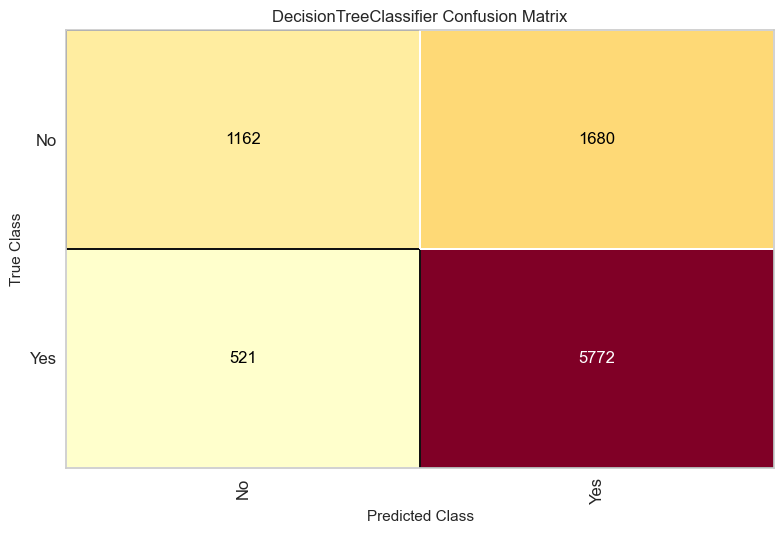

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [601]:
cm = ConfusionMatrix(model4, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

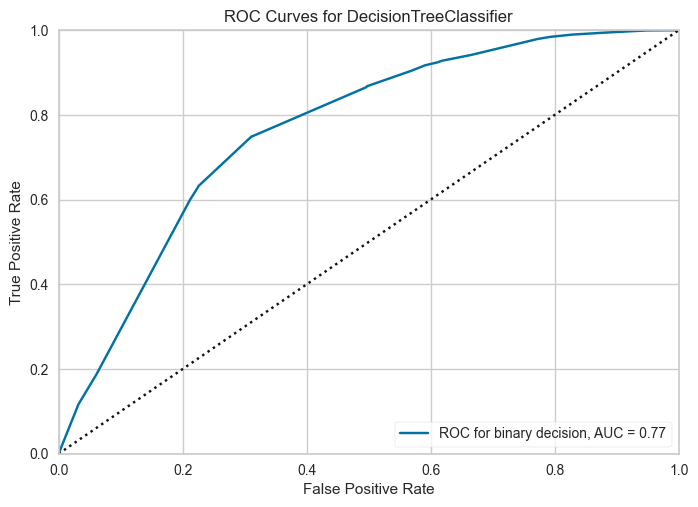

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [602]:
visualizer = ROCAUC(model4, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [603]:
ypred = model4.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m4=pd.DataFrame({'Model':['DecisionTree_GridSearch'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m4

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591


In [604]:
Results = pd.concat([Results,m4],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591


## Base RandomForest Classifier

In [606]:
r=RandomForestClassifier(random_state=10)
model5 = r.fit(X_train,y_train)
train_pred = model5.predict(X_train)
accuracy_score(y_train,train_pred)

0.994234207933438

In [950]:
print(get_test_report(model5,X_test,y_test))

              precision    recall  f1-score   support

           0       0.63      0.47      0.54      2842
           1       0.79      0.87      0.83      6293

    accuracy                           0.75      9135
   macro avg       0.71      0.67      0.68      9135
weighted avg       0.74      0.75      0.74      9135



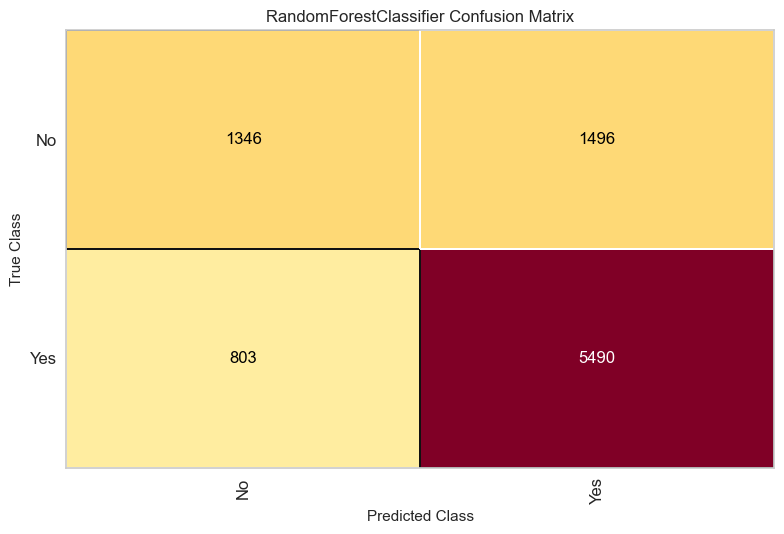

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [608]:
cm = ConfusionMatrix(model5, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

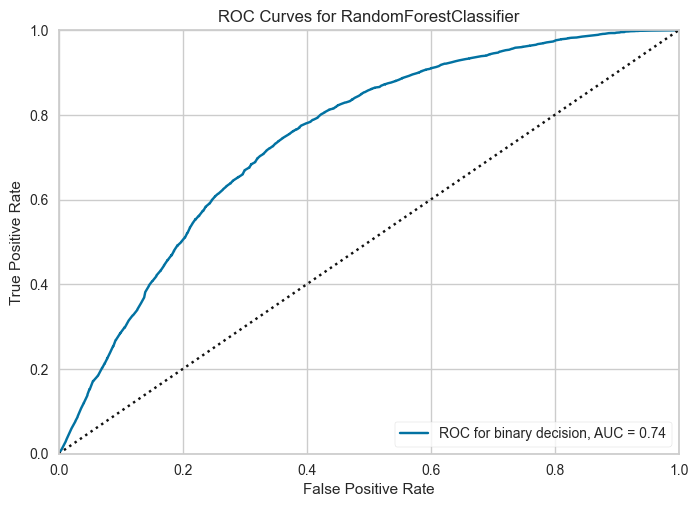

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [609]:
visualizer = ROCAUC(model5, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [611]:
ypred = model5.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m5=pd.DataFrame({'Model':['Base RandomForest'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m5

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483


In [612]:
Results = pd.concat([Results,m5],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483


## Grid Search RandomForest Classifier

In [619]:
tuned_paramaters = {'n_estimators':[i for i in range(100,500,50)]}

rf = RandomForestClassifier(random_state=10)

rf_grid = GridSearchCV(estimator = rf, 
                          param_grid = tuned_paramaters, 
                          cv = 5)


rf_grid.fit(X_train, y_train)

print('Best parameters for RandomForest Classifier ', rf_grid.best_params_, '\n')

Best parameters for RandomForest Classifier  {'n_estimators': 350} 



In [657]:
for i in range(1,len(X_train.columns)+1):
    if i==1:
        cols = ['Model_Name', 'Accuracy Train', 'Accuracy Test', 'Misclassifications','type1 error', 'type2 error','precision', 'recall', 'f1','auc']
        RandomForest = pd.DataFrame(columns = cols)
    random=RandomForestClassifier(criterion='gini',n_estimators=350,max_depth=8,oob_score=True,max_features=i,random_state=10)
    rf=random.fit(X_train,y_train)
    test_pred=rf.predict(X_test)
    train_pred=rf.predict(X_train)
    cm = confusion_matrix(y_test,test_pred)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    MLR_full_model_metrics = pd.DataFrame({'Model_Name': ["RandomForest Classifier"+'Max features='+str(i)],
                                        'Accuracy Train': round(accuracy_score(y_train,train_pred),2),
                                        'Accuracy Test': round(accuracy_score(y_test,test_pred),2),
                                        'Misclassifications':(FP+FN),
                                        'type1 error' : FP,
                                        'type2 error' : FN,
                                        'precision': round(precision_score(y_test,test_pred),2),
                                        'recall':round(recall_score(y_test,test_pred),2),
                                        'f1':round(f1_score(y_test,test_pred),2),
                                        'auc':round(roc_auc_score(y_test,test_pred),4)
                                      })
    RandomForest = pd.concat([RandomForest,MLR_full_model_metrics], ignore_index = True)
    
RandomForest

,Model_Name,Accuracy Train,Accuracy Test,Misclassifications,type1 error,type2 error,precision,recall,f1,auc
0,RandomForest ClassifierMax features=1,0.74,0.73,2443,2380,63,0.72,0.99,0.84,0.5763
1,RandomForest ClassifierMax features=2,0.77,0.75,2280,2031,249,0.75,0.96,0.84,0.6229
2,RandomForest ClassifierMax features=3,0.78,0.76,2238,1863,375,0.76,0.94,0.84,0.6424
3,RandomForest ClassifierMax features=4,0.78,0.76,2198,1819,379,0.76,0.94,0.84,0.6499
4,RandomForest ClassifierMax features=5,0.79,0.76,2158,1708,450,0.77,0.93,0.84,0.6638
5,RandomForest ClassifierMax features=6,0.79,0.76,2154,1691,463,0.78,0.93,0.84,0.6657
6,RandomForest ClassifierMax features=7,0.79,0.77,2125,1644,481,0.78,0.92,0.85,0.6725
7,RandomForest ClassifierMax features=8,0.79,0.77,2129,1637,492,0.78,0.92,0.84,0.6729
8,RandomForest ClassifierMax features=9,0.79,0.77,2131,1633,498,0.78,0.92,0.84,0.6731
9,RandomForest ClassifierMax features=10,0.79,0.77,2134,1609,525,0.78,0.92,0.84,0.6752


In [658]:
RandomForest.sort_values(by = 'Misclassifications',ascending = True)

,Model_Name,Accuracy Train,Accuracy Test,Misclassifications,type1 error,type2 error,precision,recall,f1,auc
6,RandomForest ClassifierMax features=7,0.79,0.77,2125,1644,481,0.78,0.92,0.85,0.6725
7,RandomForest ClassifierMax features=8,0.79,0.77,2129,1637,492,0.78,0.92,0.84,0.6729
13,RandomForest ClassifierMax features=14,0.79,0.77,2130,1591,539,0.78,0.91,0.84,0.6773
8,RandomForest ClassifierMax features=9,0.79,0.77,2131,1633,498,0.78,0.92,0.84,0.6731
9,RandomForest ClassifierMax features=10,0.79,0.77,2134,1609,525,0.78,0.92,0.84,0.6752
14,RandomForest ClassifierMax features=15,0.79,0.77,2136,1560,576,0.79,0.91,0.84,0.6798
10,RandomForest ClassifierMax features=11,0.79,0.77,2138,1595,543,0.78,0.91,0.84,0.6762
11,RandomForest ClassifierMax features=12,0.79,0.77,2138,1592,546,0.78,0.91,0.84,0.6765
15,RandomForest ClassifierMax features=16,0.79,0.77,2142,1568,574,0.78,0.91,0.84,0.6785
12,RandomForest ClassifierMax features=13,0.79,0.77,2143,1607,536,0.78,0.91,0.84,0.6747


In [660]:
rf = RandomForestClassifier(n_estimators=350,max_depth=8,max_features=7,oob_score=True,random_state=10)
model6 = rf.fit(X_train,y_train)
train_pred = model6.predict(X_train)
accuracy_score(y_train,train_pred)

0.7872130788599788

In [951]:
print(get_test_report(model6,X_test,y_test))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53      2842
           1       0.78      0.92      0.85      6293

    accuracy                           0.77      9135
   macro avg       0.75      0.67      0.69      9135
weighted avg       0.76      0.77      0.75      9135



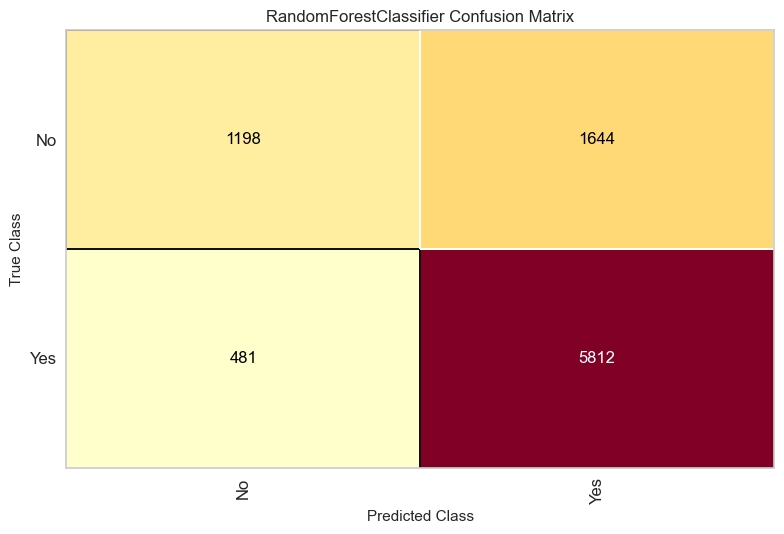

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [661]:
cm = ConfusionMatrix(model6, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

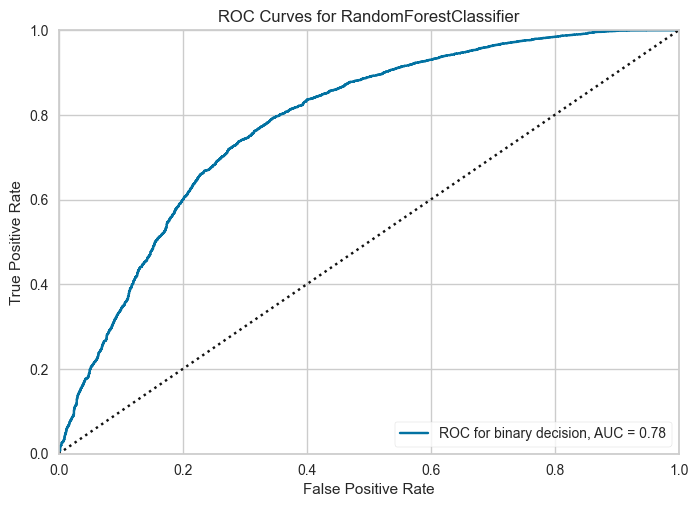

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [665]:
visualizer = ROCAUC(model6, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [663]:
ypred = model6.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m6=pd.DataFrame({'Model':['RandomForest GridSearch'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m6

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674


In [666]:
Results = pd.concat([Results,m6],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674


## Base KNN

In [668]:
knn_classification = KNeighborsClassifier()
model7 = knn_classification.fit(X_train, y_train)
train_pred = model7.predict(X_train)
accuracy_score(y_train, train_pred)

0.7935262562493157

In [952]:
print(get_test_report(model7,X_test,y_test))

              precision    recall  f1-score   support

           0       0.53      0.33      0.40      2842
           1       0.74      0.87      0.80      6293

    accuracy                           0.70      9135
   macro avg       0.63      0.60      0.60      9135
weighted avg       0.67      0.70      0.68      9135



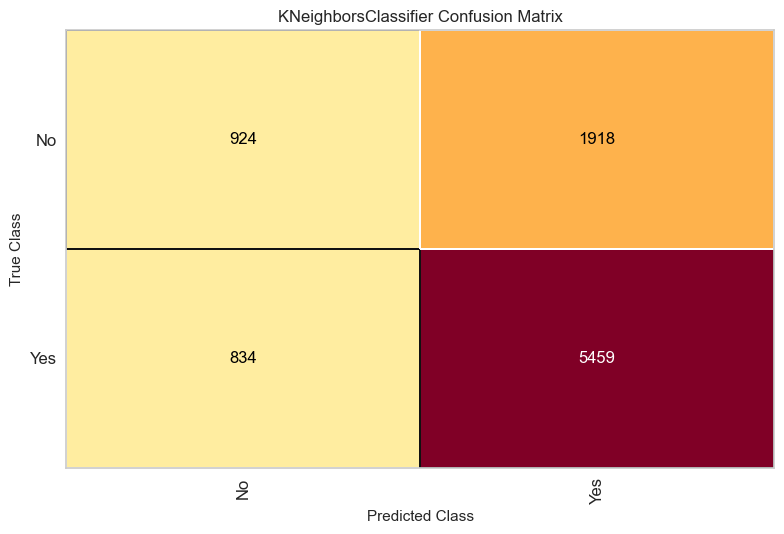

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [669]:
cm = ConfusionMatrix(model7, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

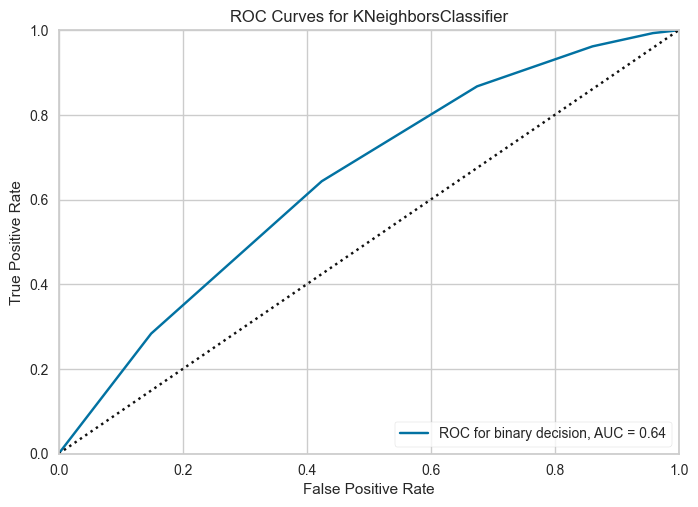

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [670]:
visualizer = ROCAUC(model7, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [684]:
ypred = model7.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m7=pd.DataFrame({'Model':['Base KNN'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m7

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base KNN,2752,1918,834,0.74,0.87,0.77,0.7,0.8,0.7523


In [672]:
Results = pd.concat([Results,m7],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987


## Grid Search KNN

In [677]:
tuned_paramaters = {'metric': ['hamming','euclidean','manhattan','Chebyshev'],'n_neighbors': np.arange(1, 25, 1)}
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train,y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'hamming', 'n_neighbors': 23} 



In [679]:
knn_classification = KNeighborsClassifier(n_neighbors = 23,metric='hamming')
model8 = knn_classification.fit(X_train, y_train)
train_pred = model8.predict(X_train)
accuracy_score(y_train,train_pred)

0.7713389044995074

In [953]:
print(get_test_report(model8,X_test,y_test))

              precision    recall  f1-score   support

           0       0.70      0.36      0.47      2842
           1       0.76      0.93      0.84      6293

    accuracy                           0.75      9135
   macro avg       0.73      0.64      0.66      9135
weighted avg       0.74      0.75      0.72      9135



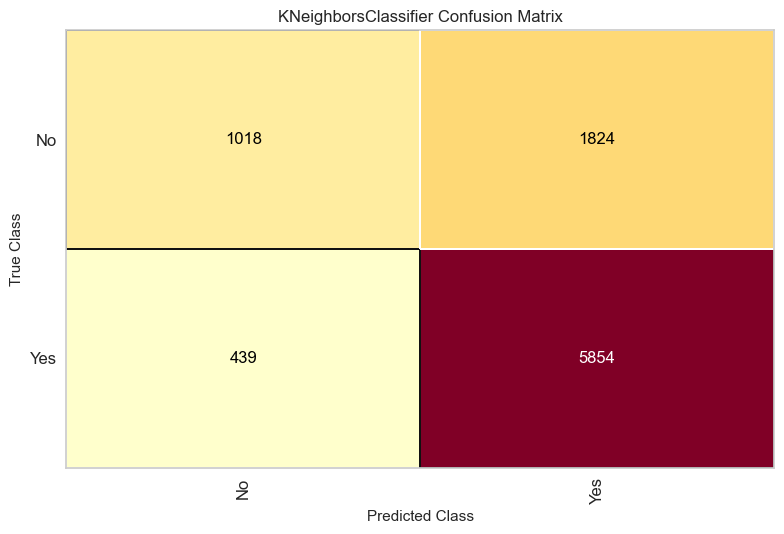

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [680]:
cm = ConfusionMatrix(model8, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

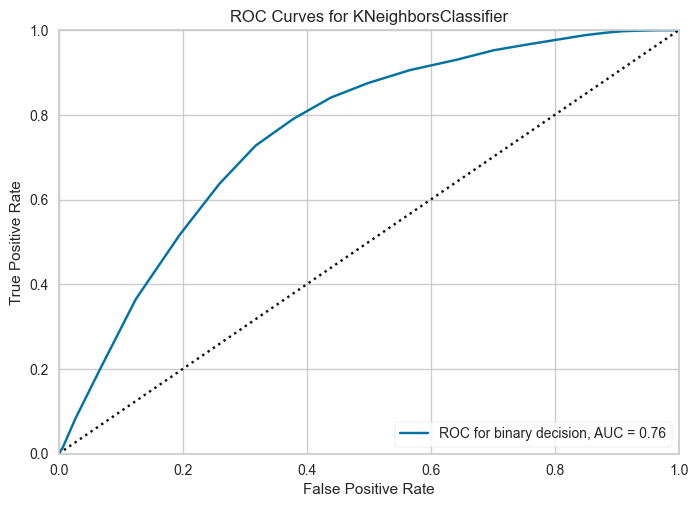

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [681]:
visualizer = ROCAUC(model8, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [683]:
ypred = model8.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m8=pd.DataFrame({'Model':['KNN Gridsearch'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m8

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523


In [685]:
Results = pd.concat([Results,m8],ignore_index = True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523


## Base Gaussian Naive Bayes

In [692]:
gb = GaussianNB()
model9 = gb.fit(X_train,y_train)
train_pred = model9.predict(X_train)
accuracy_score(y_train,train_pred)

0.736744152100135

In [954]:
print(get_test_report(model9,X_test,y_test))

              precision    recall  f1-score   support

           0       0.59      0.42      0.49      2842
           1       0.77      0.87      0.82      6293

    accuracy                           0.73      9135
   macro avg       0.68      0.64      0.65      9135
weighted avg       0.71      0.73      0.71      9135



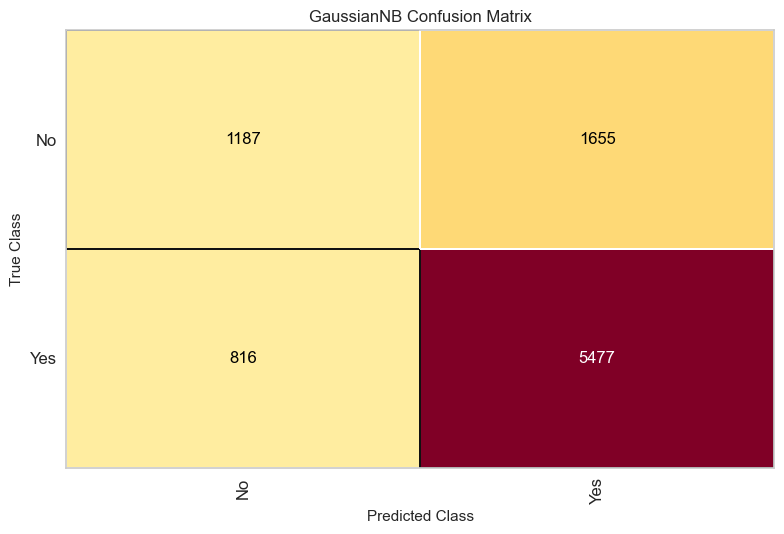

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [693]:
cm = ConfusionMatrix(model9, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

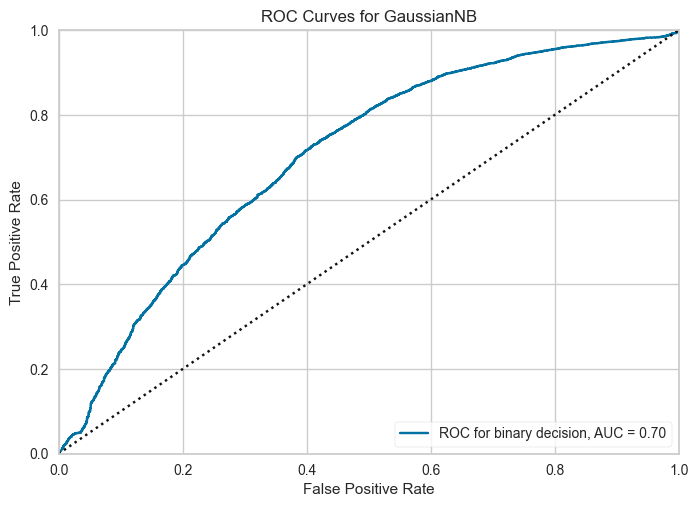

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [694]:
visualizer = ROCAUC(model9, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [696]:
ypred = model9.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m9=pd.DataFrame({'Model':['Base Gaussian Naive Bayes'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m9

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295


In [697]:
Results = pd.concat([Results,m9],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295


## Grid Search Gaussian Naive Bayes

In [701]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=500)}
gb = GaussianNB()
gs_NB = GridSearchCV(estimator=gb, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')
gs_NB.fit(X_train,y_train)
print('Best parameters for Gaussian Naive Bayes Classifier: ', gs_NB.best_params_, '\n')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best parameters for Gaussian Naive Bayes Classifier:  {'var_smoothing': 0.0016010644613183177} 



In [702]:
gb = GaussianNB(var_smoothing= 0.0016010644613183177)
model10 = gb.fit(X_train,y_train)
train_pred = model10.predict(X_train)
accuracy_score(y_train,train_pred)

0.7419990511987739

In [955]:
print(get_test_report(model10,X_test,y_test))

              precision    recall  f1-score   support

           0       0.65      0.35      0.46      2842
           1       0.76      0.91      0.83      6293

    accuracy                           0.74      9135
   macro avg       0.70      0.63      0.64      9135
weighted avg       0.72      0.74      0.71      9135



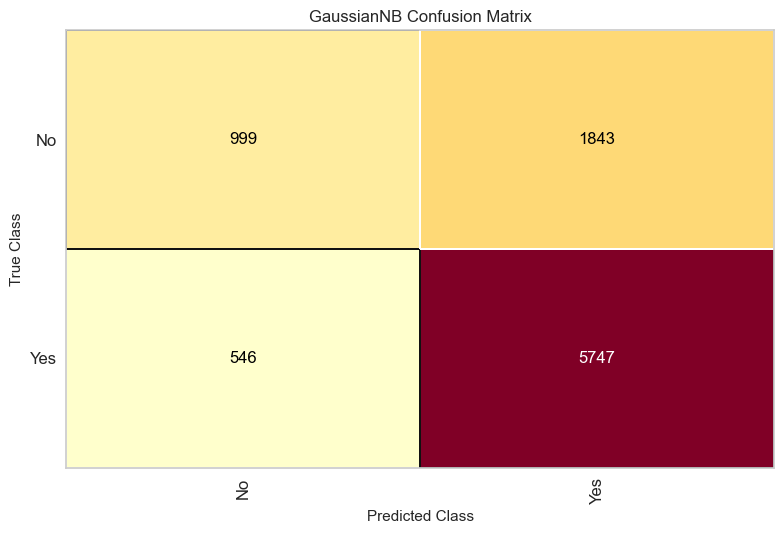

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [705]:
cm = ConfusionMatrix(model10, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

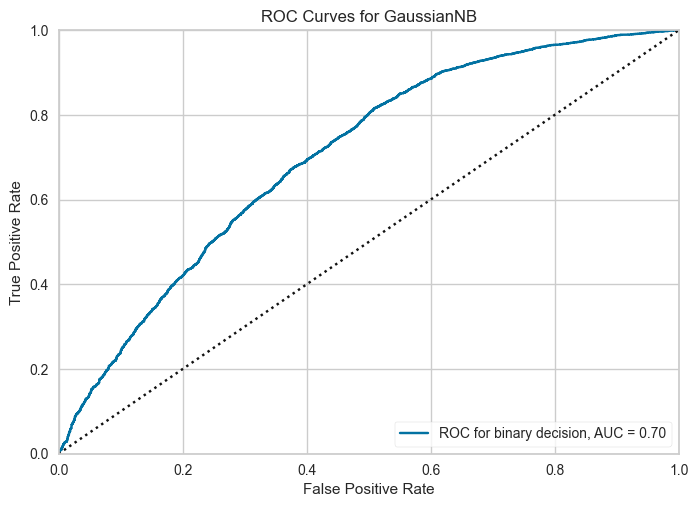

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [706]:
visualizer = ROCAUC(model10, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [713]:
ypred = model10.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m10=pd.DataFrame({'Model':['Gaussian Naive Bayes GridSearch'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m10

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


In [714]:
Results = pd.concat([Results,m10],ignore_index = True)

In [715]:
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


## Base SVM

In [717]:
svc = SVC(random_state=10)
model11 = svc.fit(X_train,y_train)
train_pred= model11.predict(X_train)
accuracy_score(y_train,train_pred)

0.7370725832938

In [956]:
print(get_test_report(model11,X_test,y_test))

              precision    recall  f1-score   support

           0       0.62      0.37      0.47      2842
           1       0.76      0.90      0.82      6293

    accuracy                           0.73      9135
   macro avg       0.69      0.64      0.64      9135
weighted avg       0.72      0.73      0.71      9135



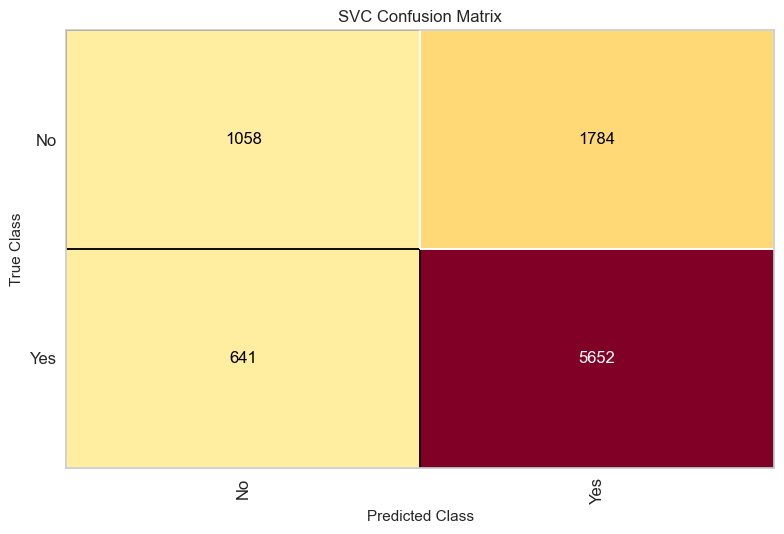

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [718]:
cm = ConfusionMatrix(model11, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

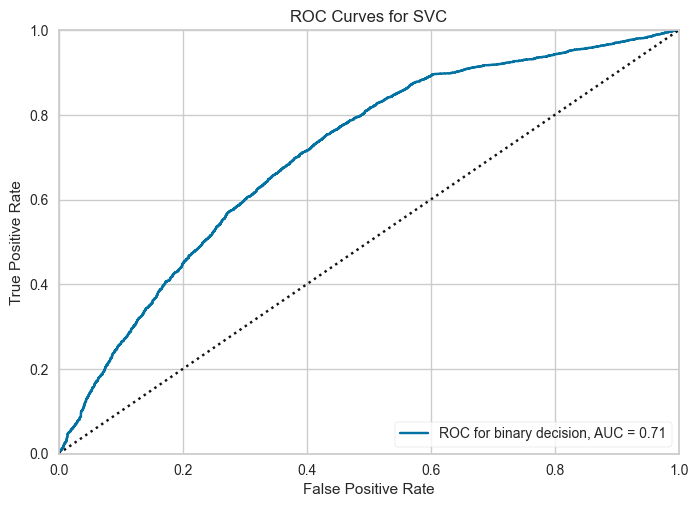

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [719]:
visualizer = ROCAUC(model11, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [723]:
ypred = model11.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m11=pd.DataFrame({'Model':['Base Support Vector Machine'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m11

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Support Vector Machine,2425,1784,641,0.76,0.9,0.74,0.73,0.82,0.7345


In [725]:
Results = pd.concat([Results,m11],ignore_index = True)

In [726]:
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


## Grid Search SVM

In [732]:
params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
         }
svc = SVC(random_state=10)
svc_grid = GridSearchCV(estimator=svc, 
                     param_grid=params, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')
svc_grid.fit(X_train,y_train)
print('Best parameters for SVM Classifier: ', svc_grid.best_params_, '\n')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for SVM Classifier:  {'kernel': 'linear'} 



In [733]:
svc = SVC(kernel = 'linear',random_state=10)
model12 = svc.fit(X_train,y_train)
train_pred = model12.predict(X_train)
accuracy_score(y_train,train_pred)

0.7390431704557895

In [957]:
print(get_test_report(model12,X_test,y_test))

              precision    recall  f1-score   support

           0       0.62      0.38      0.47      2842
           1       0.76      0.90      0.82      6293

    accuracy                           0.74      9135
   macro avg       0.69      0.64      0.65      9135
weighted avg       0.72      0.74      0.71      9135



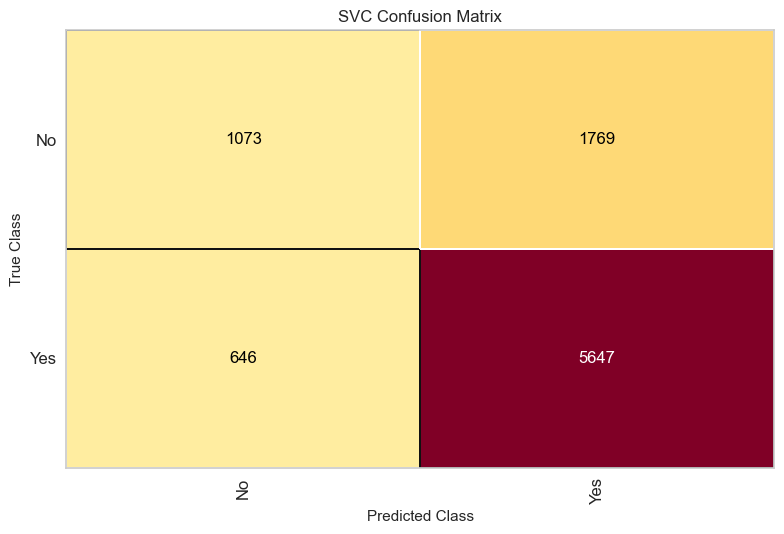

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [734]:
cm = ConfusionMatrix(model12, classes=['No','Yes'],force_model=True)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

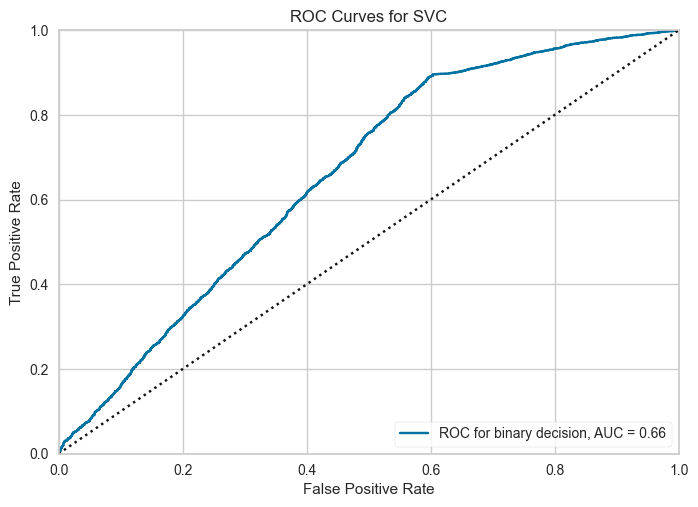

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [735]:
visualizer = ROCAUC(model12, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [736]:
ypred = model12.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m12=pd.DataFrame({'Model':['Support Vector Machine Gridsearch'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score_,4)
            })
m12

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Support Vector Machine Gridsearch,2415,1769,646,0.76,0.9,0.74,0.74,0.82,0.7356


In [737]:
Results = pd.concat([Results,m12],ignore_index = True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


## Base AdaBoost

In [742]:
model13 = AdaBoostClassifier(random_state = 10)
model13.fit(X_train, y_train)
train_pred = model13.predict(X_train)
accuracy_score(y_train,train_pred)

0.7553917454293325

In [958]:
print(get_test_report(model13,X_test,y_test))

              precision    recall  f1-score   support

           0       0.66      0.41      0.50      2842
           1       0.77      0.90      0.83      6293

    accuracy                           0.75      9135
   macro avg       0.71      0.66      0.67      9135
weighted avg       0.74      0.75      0.73      9135



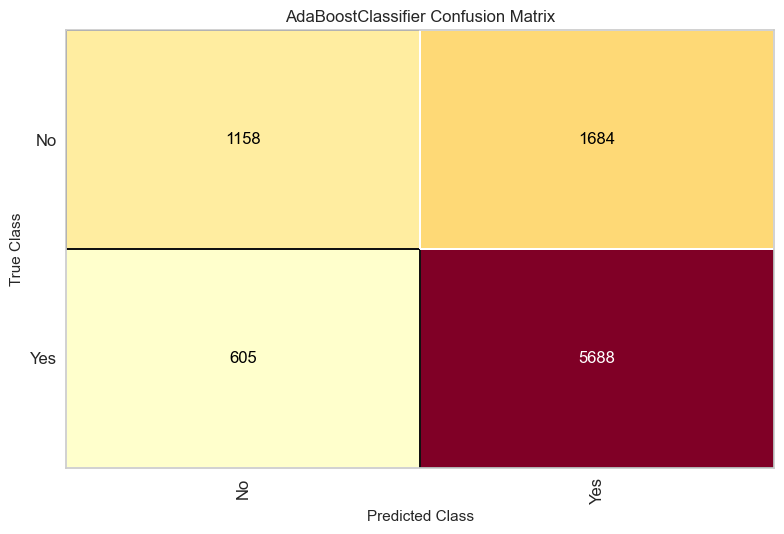

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [744]:
cm = ConfusionMatrix(model13, classes=['No','Yes'],force_model=True)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

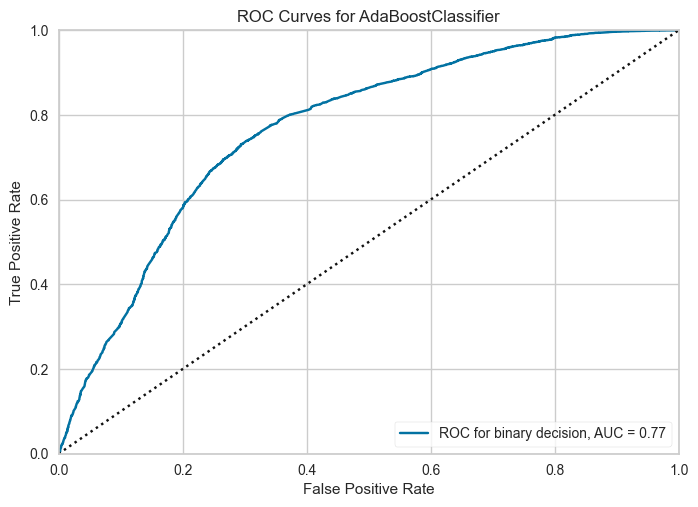

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [745]:
visualizer = ROCAUC(model13, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [749]:
ypred = model13.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m13=pd.DataFrame({'Model':['Base AdaBoost'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score(X_test,y_test),4)
            })
m13

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base AdaBoost,2289,1684,605,0.77,0.9,0.76,0.75,0.83,0.7494


In [750]:
Results = pd.concat([Results,m13],ignore_index = True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


## AdaBoost with RandomForest Estimator

In [777]:
rf = RandomForestClassifier(n_estimators=350, max_depth=8,max_features=7,oob_score=True,random_state=10)
model14 = AdaBoostClassifier(estimator=rf,random_state=10,n_estimators=10)
model14.fit(X_train,y_train)
train_pred = model14.predict(X_train)
accuracy_score(y_train,train_pred)

0.8273181768419516

In [959]:
print(get_test_report(model14,X_test,y_test))

              precision    recall  f1-score   support

           0       0.70      0.46      0.55      2842
           1       0.79      0.91      0.84      6293

    accuracy                           0.77      9135
   macro avg       0.74      0.69      0.70      9135
weighted avg       0.76      0.77      0.75      9135



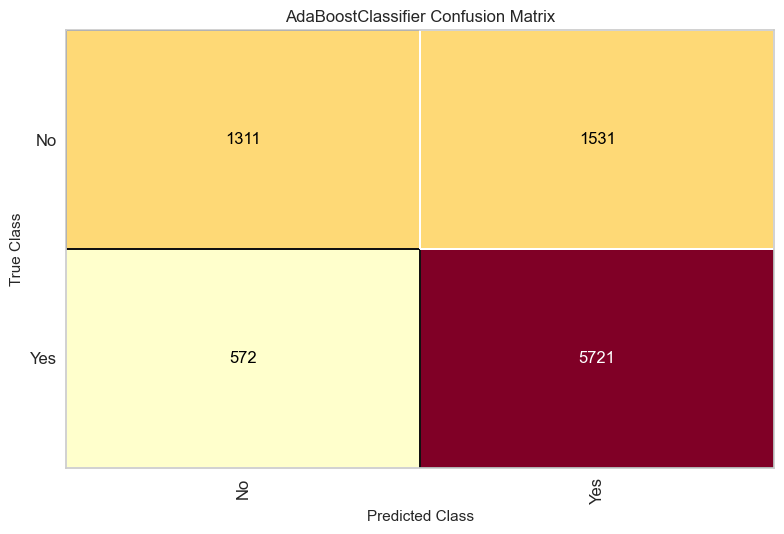

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [778]:
cm = ConfusionMatrix(model14, classes=['No','Yes'],force_model=True)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

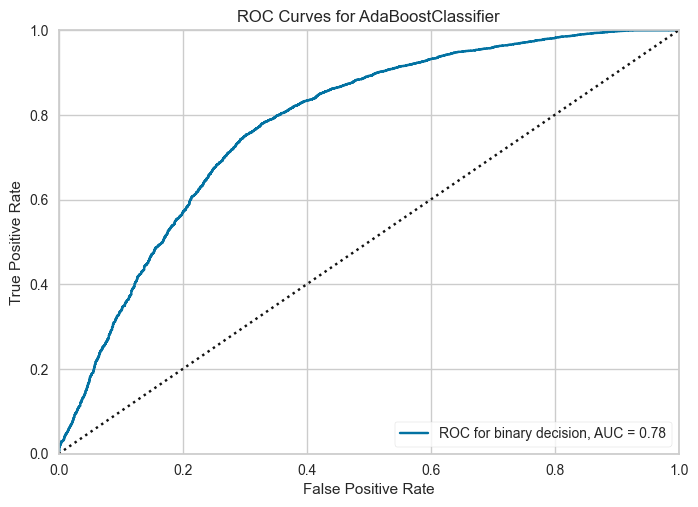

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [779]:
visualizer = ROCAUC(model14, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [780]:
ypred = model14.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m14=pd.DataFrame({'Model':['AdaBoost estimator RandomForest'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score(X_test,y_test),4)
            })
m14

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,AdaBoost estimator RandomForest,2103,1531,572,0.79,0.91,0.83,0.77,0.84,0.7698


In [781]:
Results = pd.concat([Results,m14],ignore_index=True)

In [782]:
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


## Base XGBoost Classifier

In [783]:
model15=XGBClassifier(random_state=10)
model15.fit(X_train,y_train)
train_pred = model15.predict(X_train)
accuracy_score(y_train,train_pred)

0.8187424734518118

In [960]:
print(get_test_report(model15,X_test,y_test))

              precision    recall  f1-score   support

           0       0.69      0.45      0.55      2842
           1       0.79      0.91      0.84      6293

    accuracy                           0.77      9135
   macro avg       0.74      0.68      0.69      9135
weighted avg       0.76      0.77      0.75      9135



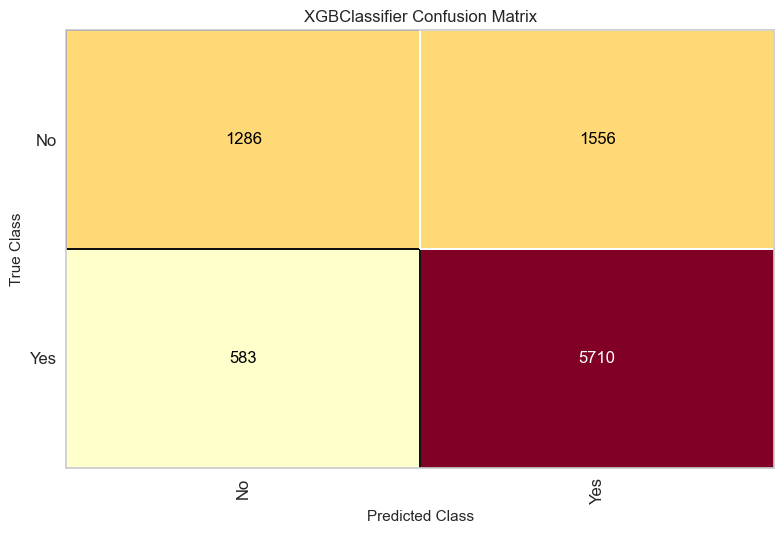

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [784]:
cm = ConfusionMatrix(model15, classes=['No','Yes'],force_model=True)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

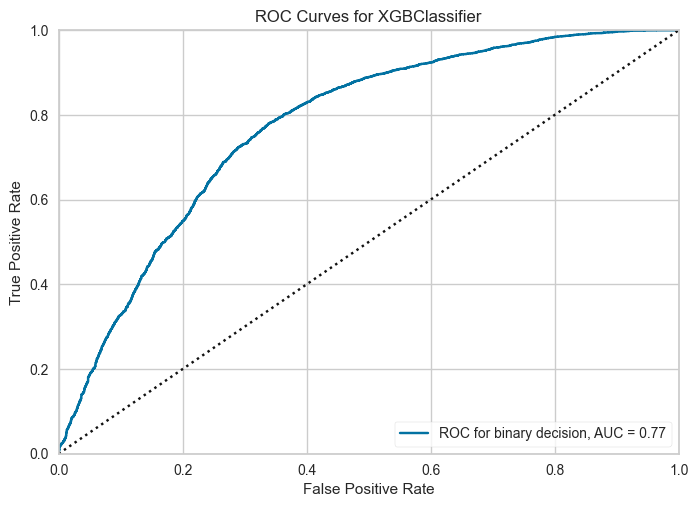

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [785]:
visualizer = ROCAUC(model15, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [843]:
ypred = model15.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m15=pd.DataFrame({'Model':['Base XGBoost'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score(X_test,y_test),4)
            })
m15

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base XGBoost,2139,1556,583,0.79,0.91,0.81,0.77,0.84,0.7654


In [787]:
Results = pd.concat([Results,m15],ignore_index=True)

In [788]:
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


## Tuning XGBoost Classifier

In [817]:
model16=XGBClassifier(n_estimators=30,learning_rate=.1,max_depth=8,random_state=10)
model16.fit(X_train,y_train)
train_pred = model16.predict(X_train)
accuracy_score(y_train,train_pred)

0.7949859504433822

In [961]:
print(get_test_report(model16,X_test,y_test))

              precision    recall  f1-score   support

           0       0.71      0.43      0.53      2842
           1       0.78      0.92      0.84      6293

    accuracy                           0.77      9135
   macro avg       0.74      0.67      0.69      9135
weighted avg       0.76      0.77      0.75      9135



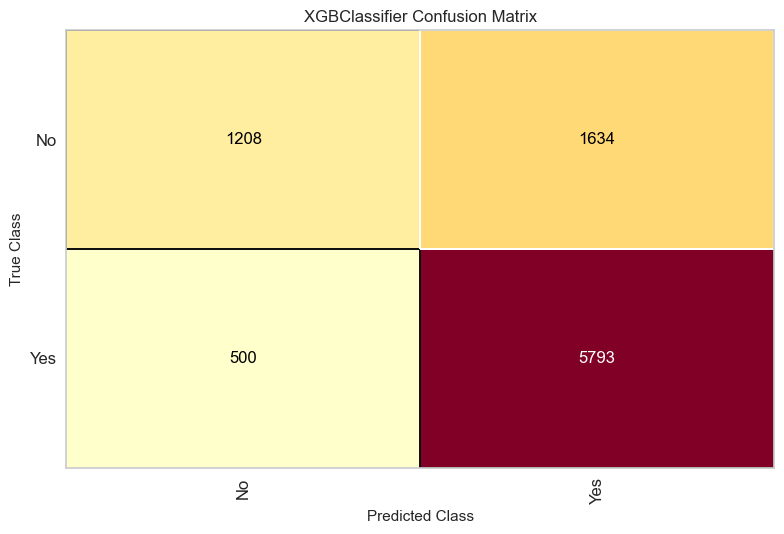

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [818]:
cm = ConfusionMatrix(model16, classes=['No','Yes'],force_model=True)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

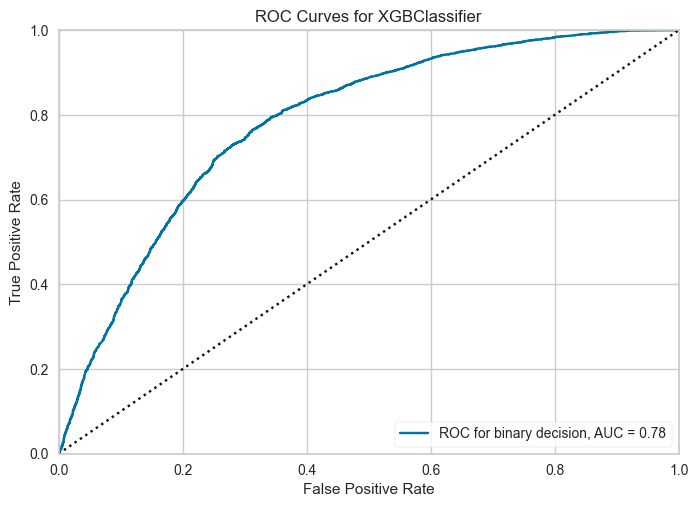

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [819]:
visualizer = ROCAUC(model16, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [841]:
ypred = model16.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m16=pd.DataFrame({'Model':['XGBoost Tuned'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score(X_test,y_test),4)
            })
m16

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,XGBoost Tuned,2134,1634,500,0.78,0.92,0.81,0.77,0.84,0.7654


In [821]:
Results = pd.concat([Results,m16],ignore_index=True)
Results

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Base Logit,2395,1843,552,0.76,0.91,0.74,0.74,0.83,0.6319
1,Logit with significant variables,2394,1845,549,0.76,0.91,0.74,0.74,0.83,0.6318
2,Base DecisionTree,3006,1423,1583,0.77,0.75,0.99,0.67,0.76,0.6709
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
6,Base KNN,2752,1918,834,0.74,0.87,0.79,0.70,0.80,0.6987
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
8,Base Gaussian Naive Bayes,2471,1655,816,0.77,0.87,0.74,0.73,0.82,0.7295
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385


## Stacking Classfier

In [879]:
Results.sort_values(['Misclassifications','auc'],ascending=(True,False)).iloc[:5,:]

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
13,AdaBoost estimator RandomForest,2103,1531,572,0.79,0.91,0.83,0.77,0.84,0.7698
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
15,XGBoost Tuned,2134,1634,500,0.78,0.92,0.79,0.77,0.84,0.7664
14,Base XGBoost,2139,1556,583,0.79,0.91,0.82,0.77,0.84,0.7658
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591


In [870]:
base = [('rf1',model6),('xgb',model16),('bxgb',model15),('dt',model4)]
model17 = StackingClassifier(estimators=base,final_estimator=model14,cv = 5,n_jobs=-1,passthrough=True)
model17.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('rf1',
                                RandomForestClassifier(max_depth=8,
                                                       max_features=7,
                                                       n_estimators=350,
                                                       oob_score=True,
                                                       random_state=10)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric...
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=10, ...)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       max_features=13,
                                                       max_leaf_nodes=23,
                                                       random_state=10))],
                   final_estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=8,
                                                                                       max_features=7,
                                                                                       oob_score=True,
                                                                                       random_state=10),
                                                      n_estimators=10,
                                                      random_state=10),
                   n_jobs=-1, passthrough=True)

In [871]:
train_pred = model17.predict(X_train)
accuracy_score(y_train,train_pred)

0.8034886691238186

In [962]:
print(get_test_report(model7,X_test,y_test))

              precision    recall  f1-score   support

           0       0.53      0.33      0.40      2842
           1       0.74      0.87      0.80      6293

    accuracy                           0.70      9135
   macro avg       0.63      0.60      0.60      9135
weighted avg       0.67      0.70      0.68      9135



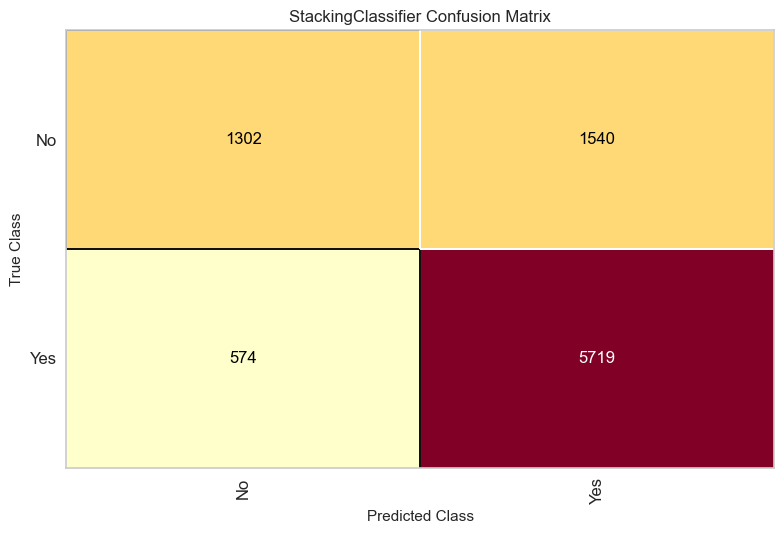

<Axes: title={'center': 'StackingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [872]:
cm = ConfusionMatrix(model17, classes=['No','Yes'],force_model=True)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

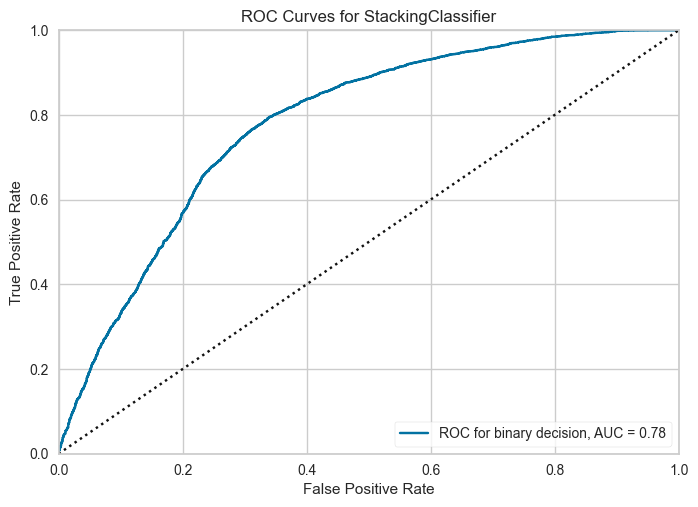

<Axes: title={'center': 'ROC Curves for StackingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [873]:
visualizer = ROCAUC(model17, classes=['No','Yes'],binary=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [874]:
ypred = model17.predict(X_test)
cm = confusion_matrix(y_test,ypred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
m17=pd.DataFrame({'Model':['Stacking Classifier'],
             'Misclassifications':FP+FN,
             'type1 error' : FP,
             'type2 error' : FN,
             'precision': round(precision_score(y_test,ypred),2),
             'recall':round(recall_score(y_test,ypred),2),
             'accuracy train':round(accuracy_score(y_train,train_pred),2),
             'accuracy test':round(accuracy_score(y_test,ypred),2),
             'f1':round(f1_score(y_test,ypred),2),
             'auc':round(visualizer.score(X_test,y_test),4)
            })
m17

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
0,Stacking Classifier,2114,1540,574,0.79,0.91,0.8,0.77,0.84,0.7686


In [880]:
Results = pd.concat([Results,m17],ignore_index = True)

# Final Results

In [882]:
Results.sort_values(['Misclassifications','auc'],ascending=(True,False))

,Model,Misclassifications,type1 error,type2 error,precision,recall,accuracy train,accuracy test,f1,auc
13,AdaBoost estimator RandomForest,2103,1531,572,0.79,0.91,0.83,0.77,0.84,0.7698
16,Stacking Classifier,2114,1540,574,0.79,0.91,0.80,0.77,0.84,0.7686
5,RandomForest GridSearch,2125,1644,481,0.78,0.92,0.79,0.77,0.85,0.7674
15,XGBoost Tuned,2134,1634,500,0.78,0.92,0.79,0.77,0.84,0.7664
14,Base XGBoost,2139,1556,583,0.79,0.91,0.82,0.77,0.84,0.7658
3,DecisionTree_GridSearch,2201,1680,521,0.77,0.92,0.76,0.76,0.84,0.7591
7,KNN Gridsearch,2263,1824,439,0.76,0.93,0.77,0.75,0.84,0.7523
12,Base AdaBoost,2289,1684,605,0.77,0.90,0.76,0.75,0.83,0.7494
4,Base RandomForest,2299,1496,803,0.79,0.87,0.99,0.75,0.83,0.7483
9,Gaussian Naive Bayes GridSearch,2389,1843,546,0.76,0.91,0.74,0.74,0.83,0.7385
